In [1]:
library(igraph)
library(latex2exp)
library(gsubfn)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'latex2exp' was built under R version 3.6.3"Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"

In [59]:
library(ramify)

Warning message:
"package 'ramify' was built under R version 3.6.3"
Attaching package: 'ramify'

The following object is masked _by_ '.GlobalEnv':

    logspace

The following object is masked from 'package:graphics':

    clip



In [2]:
printf <- function(...) cat(sprintf(...))
logspace <- function( d1, d2, n) exp(log(10)*seq(d1, d2, length.out=n))

# Part 1 - Facebook network

In this project, we will be using the dataset given below:
http://snap.stanford.edu/data/egonets-Facebook.html

## 1. Structural properties of the Facebook network

In [3]:
edge_lines = readLines("facebook_combined.txt")

In [4]:
length(edge_lines)

[1] 88234

In [5]:
edge_list = matrix(0, length(edge_lines), 2)

In [6]:
for(i in 1:length(edge_lines)){
    edge_line = edge_lines[i]
    edge = sapply(strsplit(edge_line, " "), as.numeric)
    edge_list[i, 1] = edge[1]+1
    edge_list[i, 2] = edge[2]+1
    #printf("%d - %d\n", edge[1], edge[2])
    #printf("%s\n", edge_line)
}

In [7]:
flat_edge_list = as.vector(edge_list)

In [8]:
g = graph_from_edgelist(edge_list, directed=F)

### Q1

In [9]:
print(vcount(g))

[1] 4039


In [10]:
print(ecount(g))

[1] 88234


In [11]:
print(is_connected(g))

[1] TRUE


### Q2

In [12]:
diameter(g)

[1] 8

### Q3

png 
  2

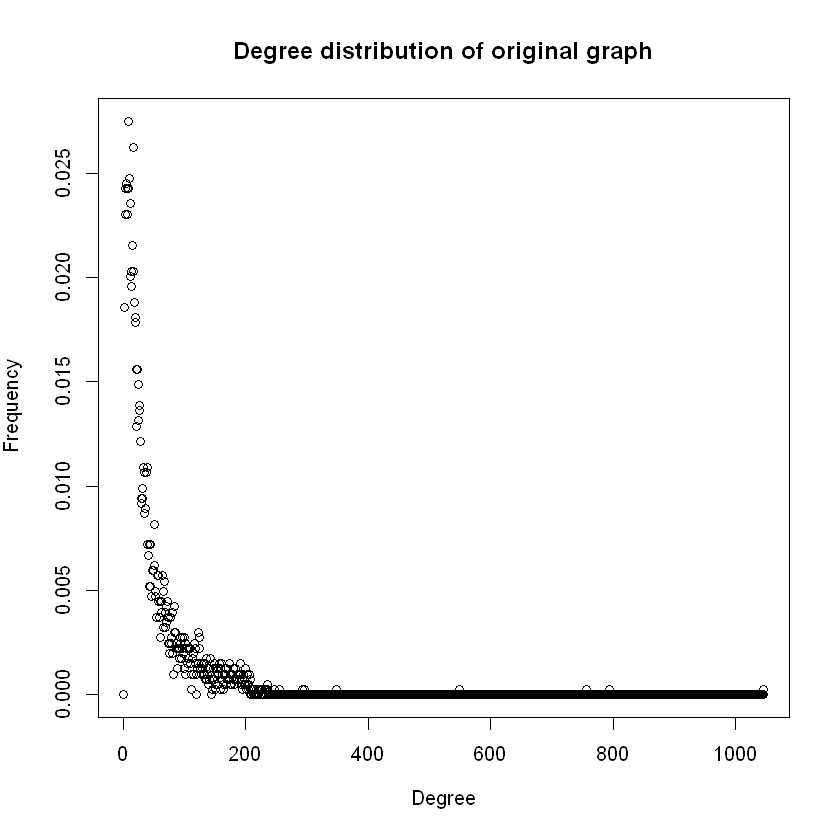

In [137]:
plot(degree_distribution(g), main="Degree distribution of original graph", xlab=TeX('Degree'), ylab=TeX('Frequency'))
png(sprintf("plots/p2q1_3.png"))
plot(degree_distribution(g), xlab=TeX('Degree'), ylab=TeX('Frequency'))
dev.off()

In [14]:
deg = degree(g)

In [15]:
mean(deg)

[1] 43.69101

### Q4

In [16]:
remove_zero_freqs = function(distr){
    return (list((1:length(distr))[distr>0], distr[distr>0]))
}

In [17]:
fit_line = function(x, y, log=FALSE){
    if(log){
        slope <- getElement(lm(log(y) ~ log(x))$coefficients[2], "log(x)")
        intercept <- getElement(lm(log(y) ~ log(x))$coefficients[1], "(Intercept)")
    }
    else{
        slope <- getElement(lm(y ~ x)$coefficients[2], "x")
        intercept <- getElement(lm(y ~ x)$coefficients[1], "(Intercept)")
    }
    return (list(slope, intercept))
}

In [145]:
draw_degree_distribution = function(g){
    list[degrees, degree_freq] <- remove_zero_freqs(degree_distribution(g))
    list[slope, int] <- fit_line(degrees, degree_freq, log=TRUE)
    
    png(sprintf("plots/p2q1_4.png"))
    plot(log(degrees), log(degree_freq), type="b", xlab="log(Degree)", ylab="log(Frequency)", main=sprintf("slope=%.4f", slope))
    abline(lm(log(degree_freq) ~ log(degrees)), col="red")
    dev.off()
    
    plot(log(degrees), log(degree_freq), type="b", xlab="log(Degree)", ylab="log(Frequency)", main=sprintf("slope=%.4f", slope))
    abline(lm(log(degree_freq) ~ log(degrees)), col="red")
    return (slope)
}

[1] -1.247526

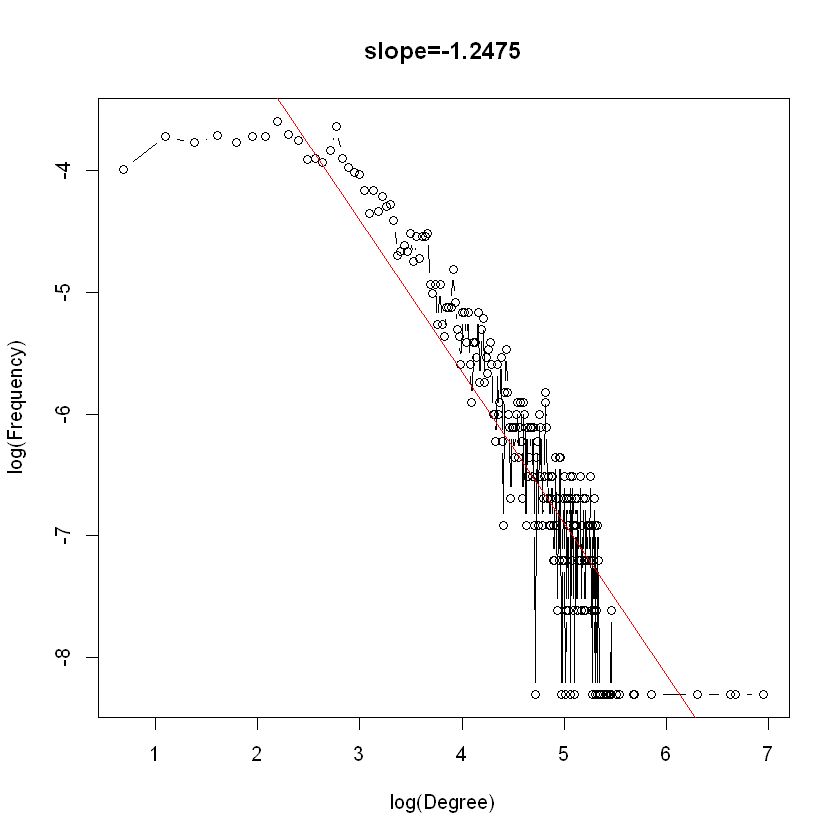

In [146]:
draw_degree_distribution(g)

## 2. Personalized network

### Q5

In [20]:
personalized_1 = make_ego_graph(g, order = 1, nodes = 1)[[1]]

In [21]:
print(length(personalized_1))

[1] 10


In [22]:
vcount(personalized_1)

[1] 348

In [23]:
ecount(personalized_1)

[1] 2866

### Q6

In [24]:
diameter(personalized_1)

[1] 2

Upper bound 2, Lower bound 1

### Q7

## 3. Core node's personalized network

In [25]:
degrees = degree(g)

In [26]:
core_degrees = degrees[degrees > 200]

### Q8

In [27]:
length(core_degrees)

[1] 40

In [28]:
mean(core_degrees)

[1] 279.375

In [29]:
degree(g, v=1087)

[1] 205

In [30]:
core_nodes = c(1, 108, 349, 484, 1087)

In [31]:
for(v in V(g)){
    V(g)[v]$id <- v
}

In [32]:
personalized_networks = make_ego_graph(g, order = 1, nodes = core_nodes)

### Q9

[1] 348
[1] 2866
Modularity of fg 1087 = 0.4131
Modularity of eb 1087 = 0.3533
Modularity of i 1087 = 0.3891


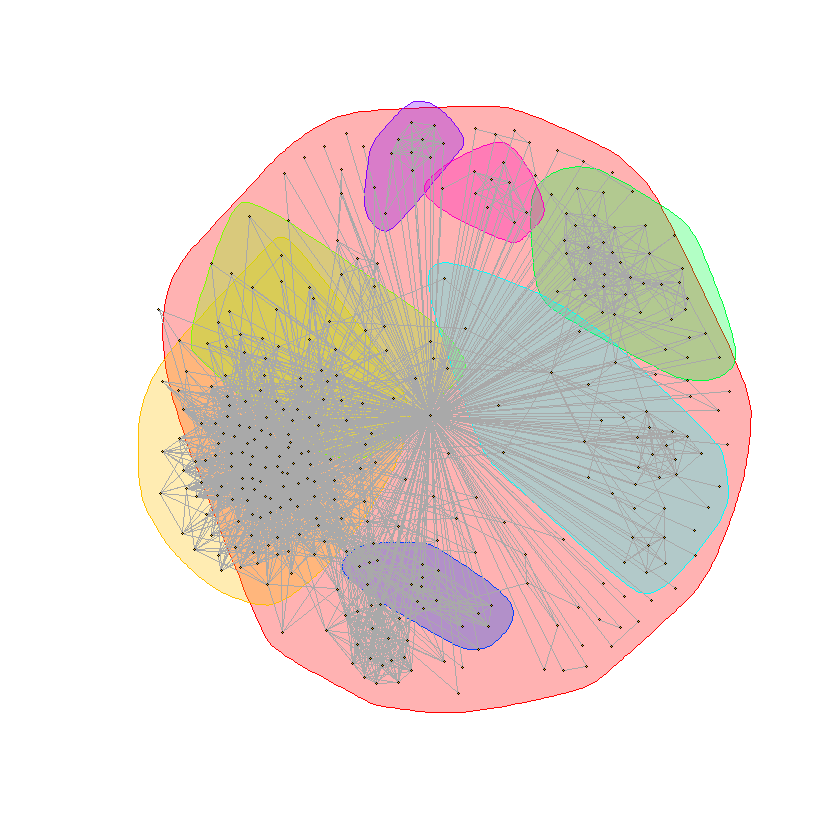

[1] 1046
[1] 27795
Modularity of fg 1087 = 0.4359
Modularity of eb 1087 = 0.5068
Modularity of i 1087 = 0.5082


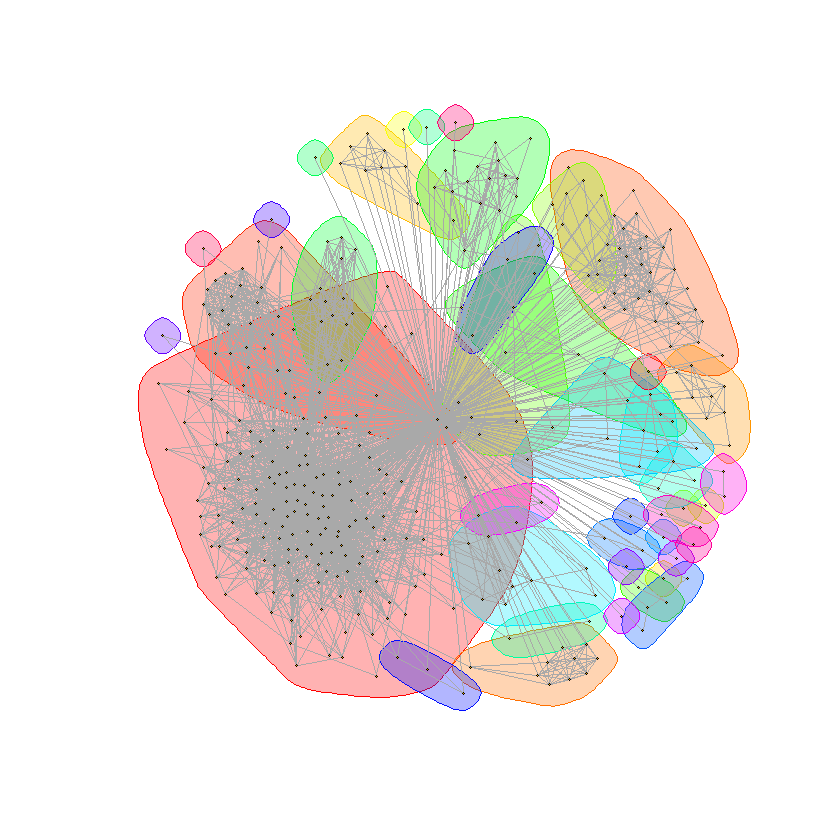

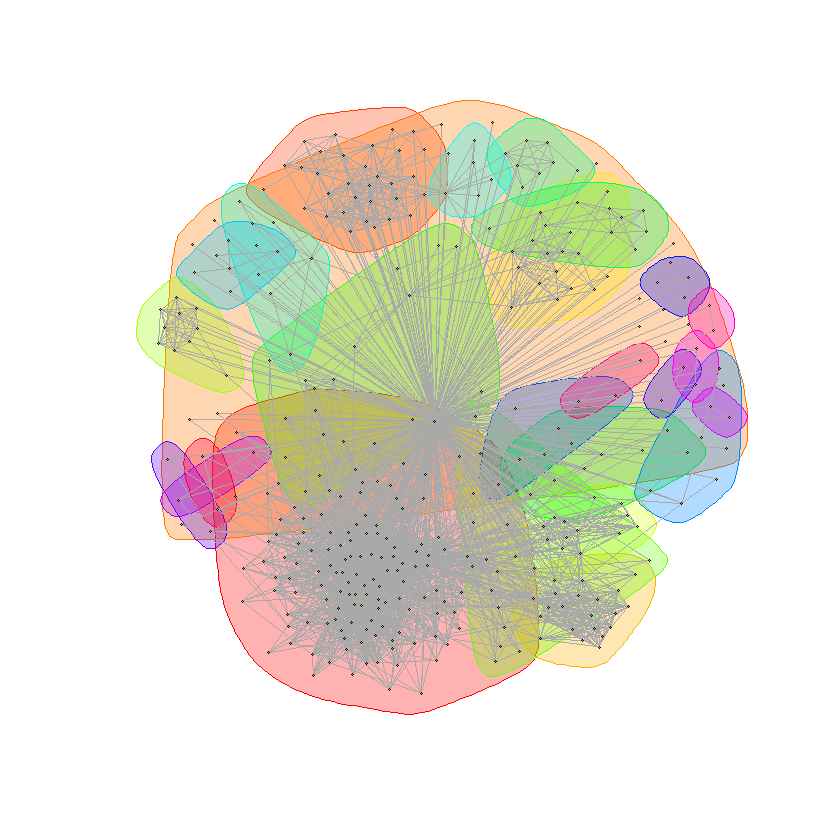

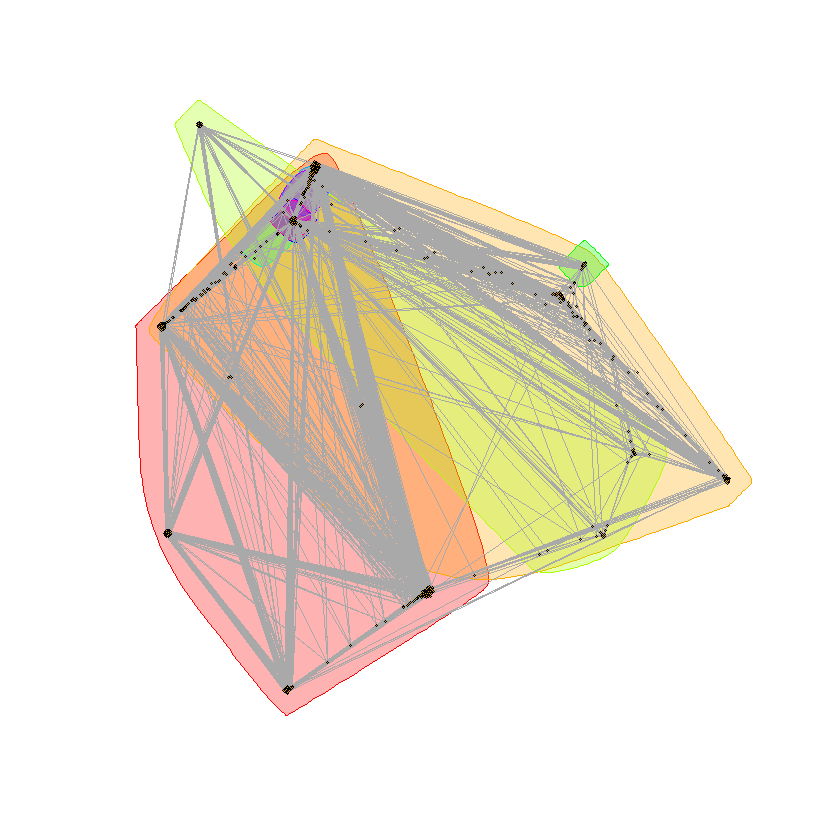

[1] 230
[1] 3441
Modularity of fg 1087 = 0.2517
Modularity of eb 1087 = 0.1335
Modularity of i 1087 = 0.0955


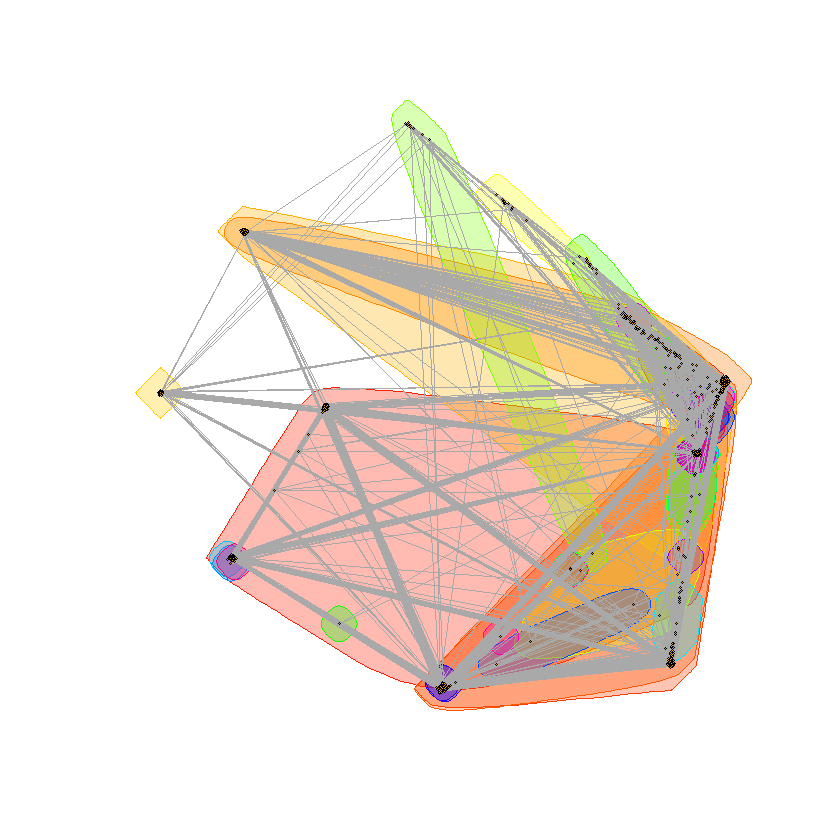

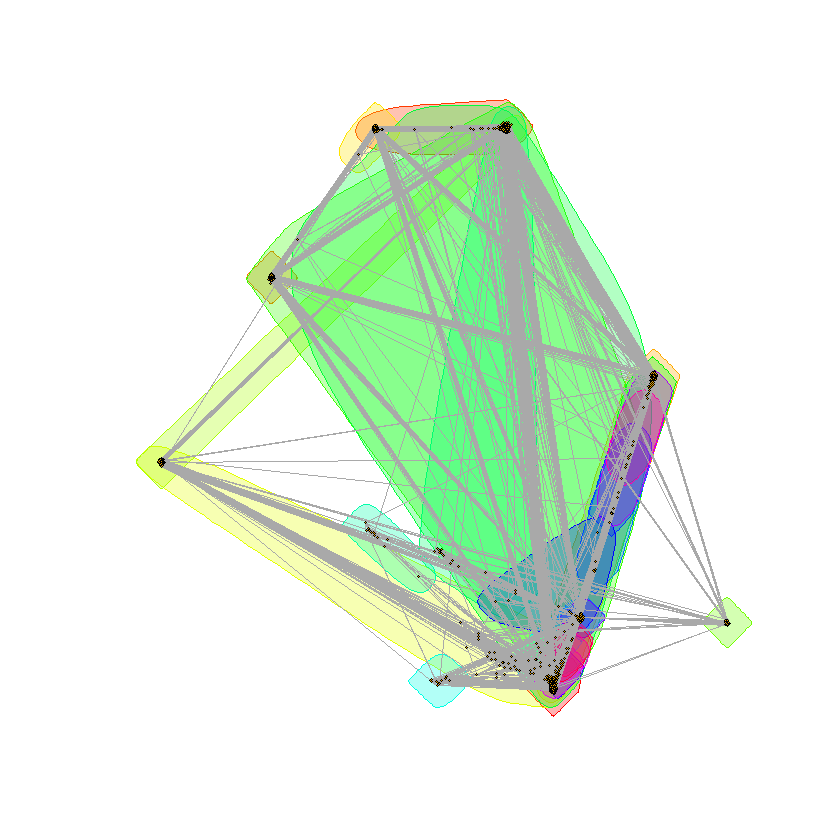

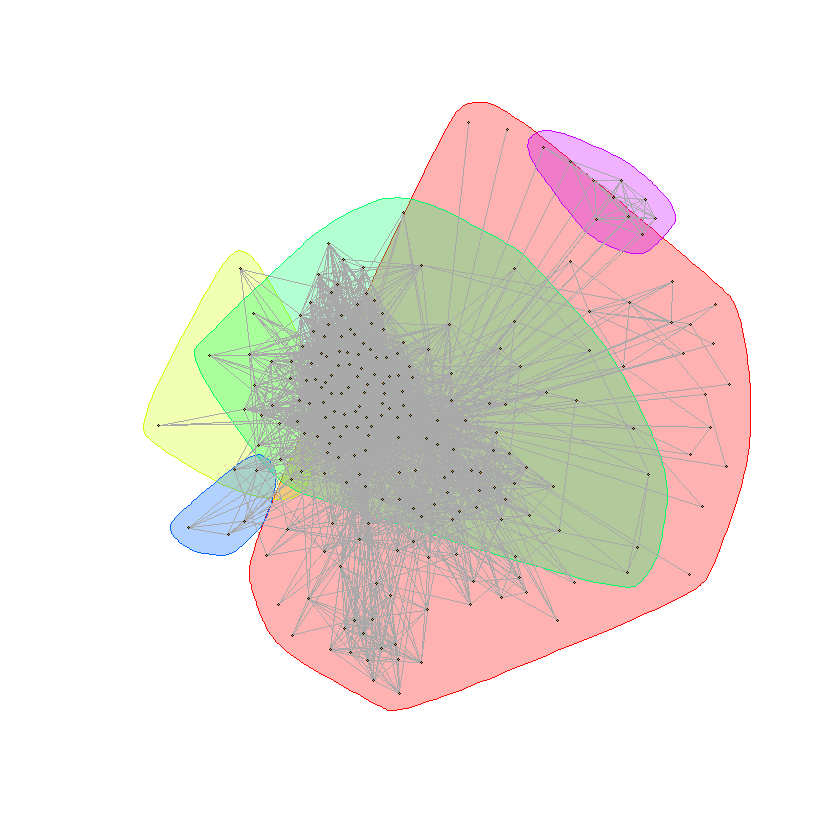

[1] 232
[1] 4525
Modularity of fg 1087 = 0.5070
Modularity of eb 1087 = 0.4891
Modularity of i 1087 = 0.5153


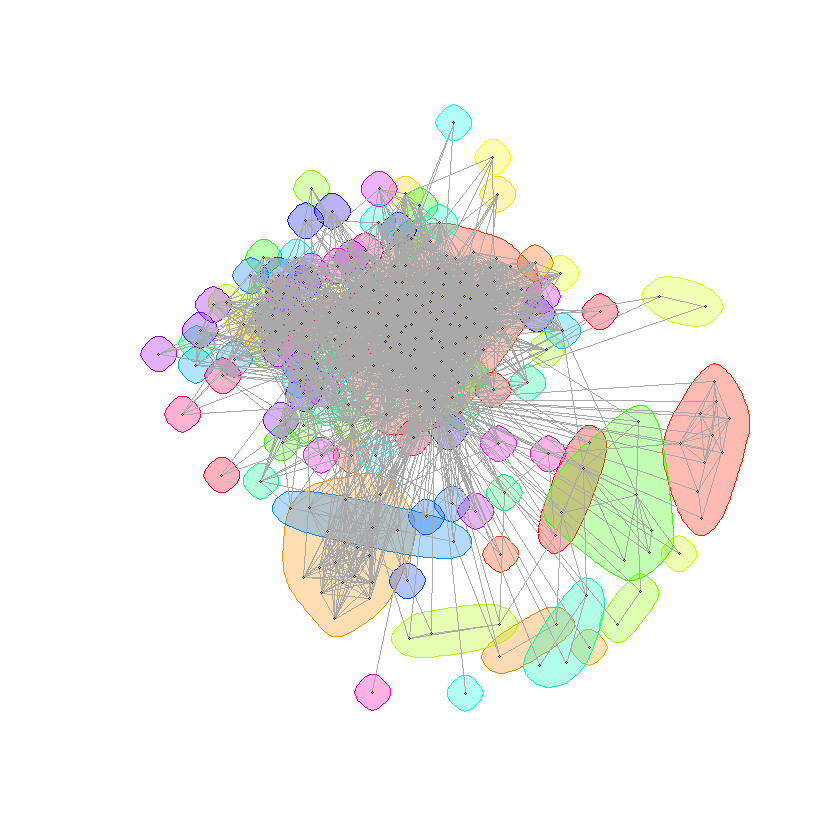

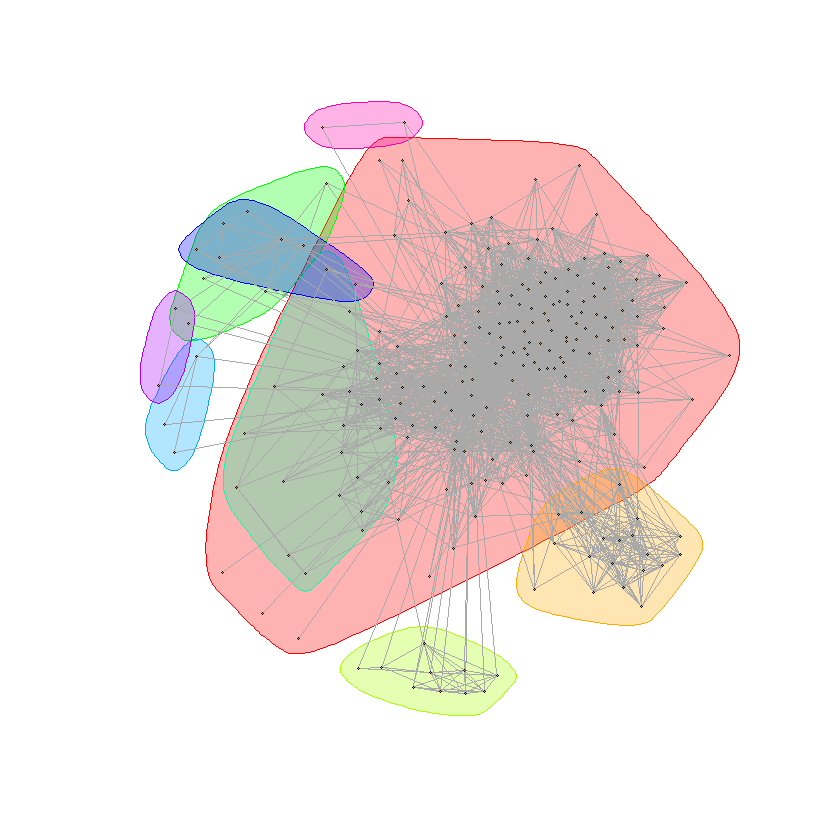

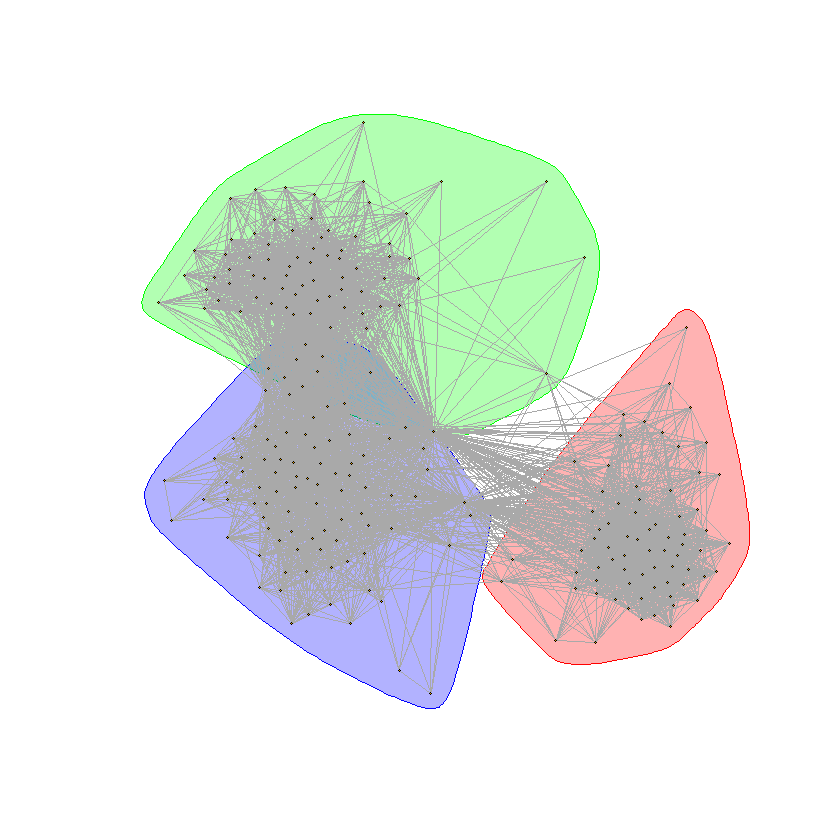

[1] 206
[1] 7409
Modularity of fg 1087 = 0.1455
Modularity of eb 1087 = 0.0276
Modularity of i 1087 = 0.0269


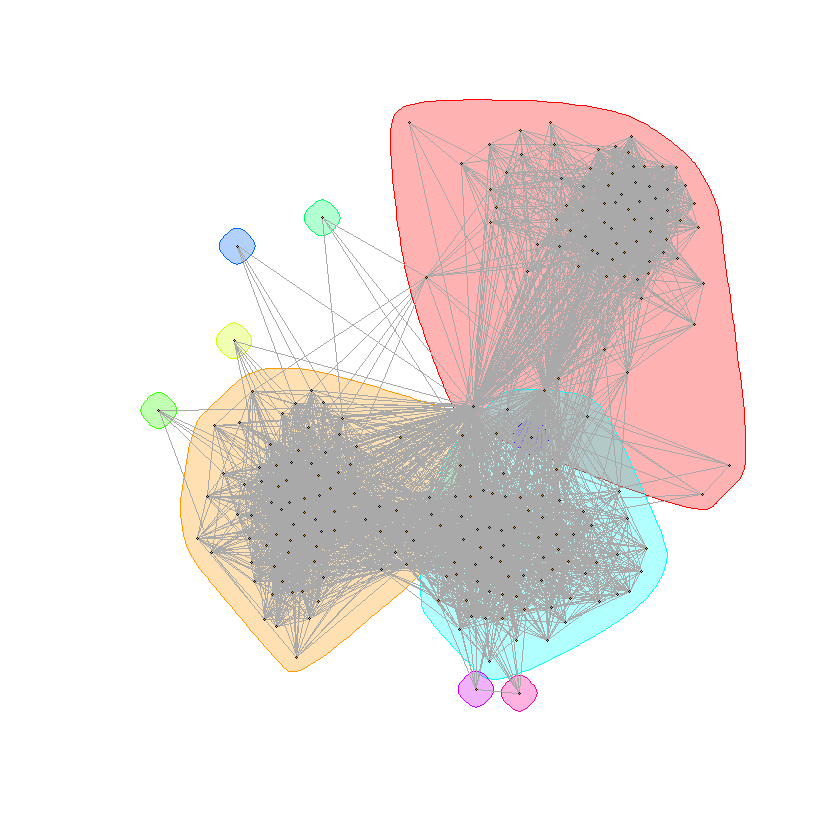

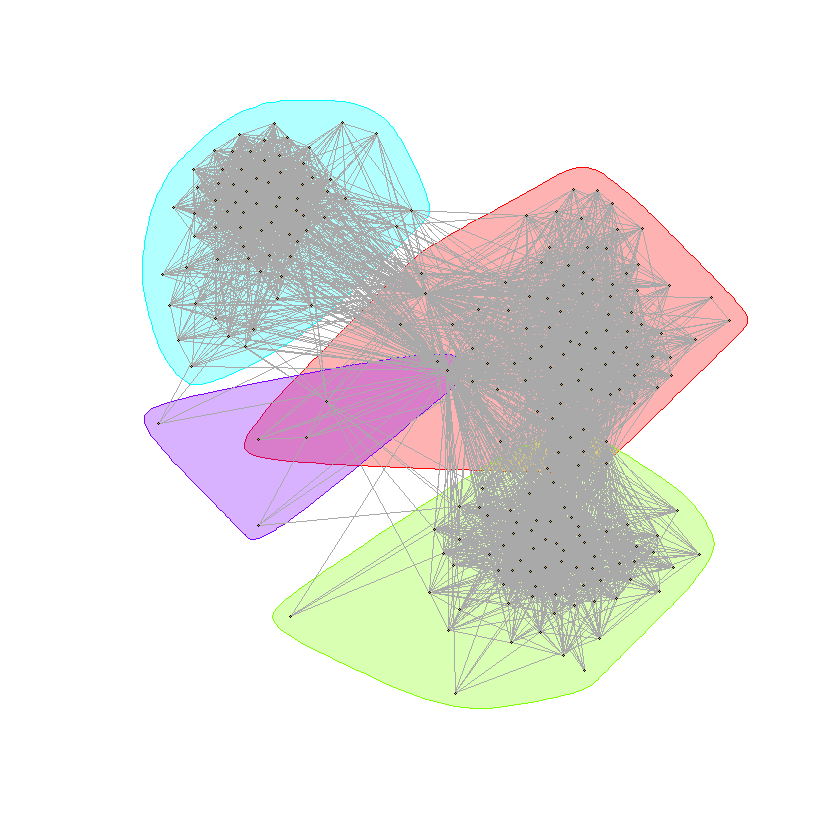

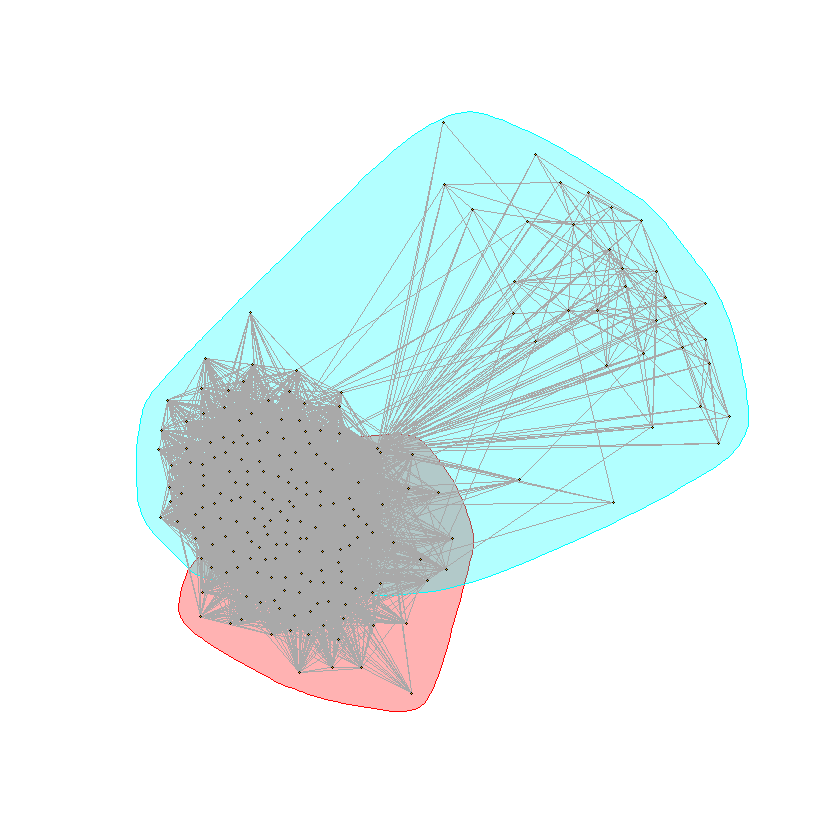

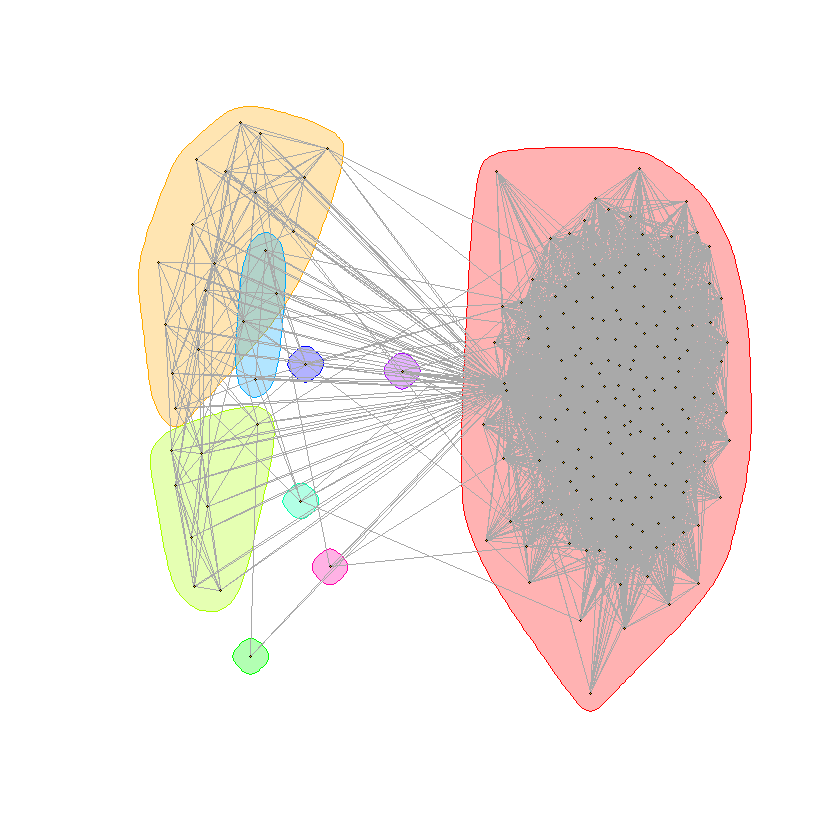

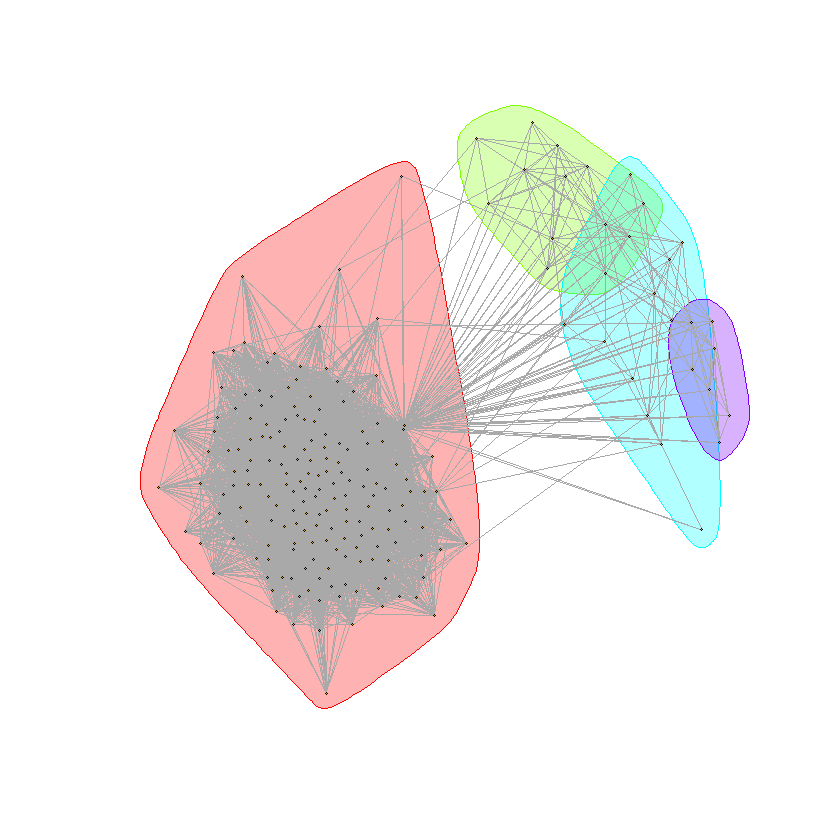

In [35]:
for(i in 1:length(core_nodes)){
    core_node = core_nodes[i]
    personalized_1 = personalized_networks[[i]]
    print(vcount(personalized_1))
    print(ecount(personalized_1))
    comms_fg= cluster_fast_greedy(personalized_1, modularity=TRUE)
    comms_eb= cluster_edge_betweenness(personalized_1, modularity=TRUE)
    comms_i= cluster_infomap(personalized_1, modularity=TRUE)
    
    printf("Modularity of fg %d = %.4f\n", core_node, modularity(comms_fg))
    printf("Modularity of eb %d = %.4f\n", core_node, modularity(comms_eb))
    printf("Modularity of i %d = %.4f\n", core_node, modularity(comms_i))

    png(sprintf("plots/p2q1_9_%d_fg.png", core_nodes[i]))
    plot(personalized_1, mark.groups=groups(comms_fg), vertex.size=1, vertex.label=NA)
    dev.off()
    png(sprintf("plots/p2q1_9_%d_eb.png", core_nodes[i]))
    plot(personalized_1, mark.groups=groups(comms_eb), vertex.size=1, vertex.label=NA)
    dev.off()
    png(sprintf("plots/p2q1_9_%d_i.png", core_nodes[i]))
    plot(personalized_1, mark.groups=groups(comms_i), vertex.size=1, vertex.label=NA)
    dev.off()
    

    plot(personalized_1, mark.groups=groups(comms_fg), vertex.size=1, vertex.label=NA)
    plot(personalized_1, mark.groups=groups(comms_eb), vertex.size=1, vertex.label=NA)
    plot(personalized_1, mark.groups=groups(comms_i), vertex.size=1, vertex.label=NA)
}

### Q10

Modularity of fg 1 = 0.4419
Modularity of eb 1 = 0.4161
Modularity of i 1 = 0.4180


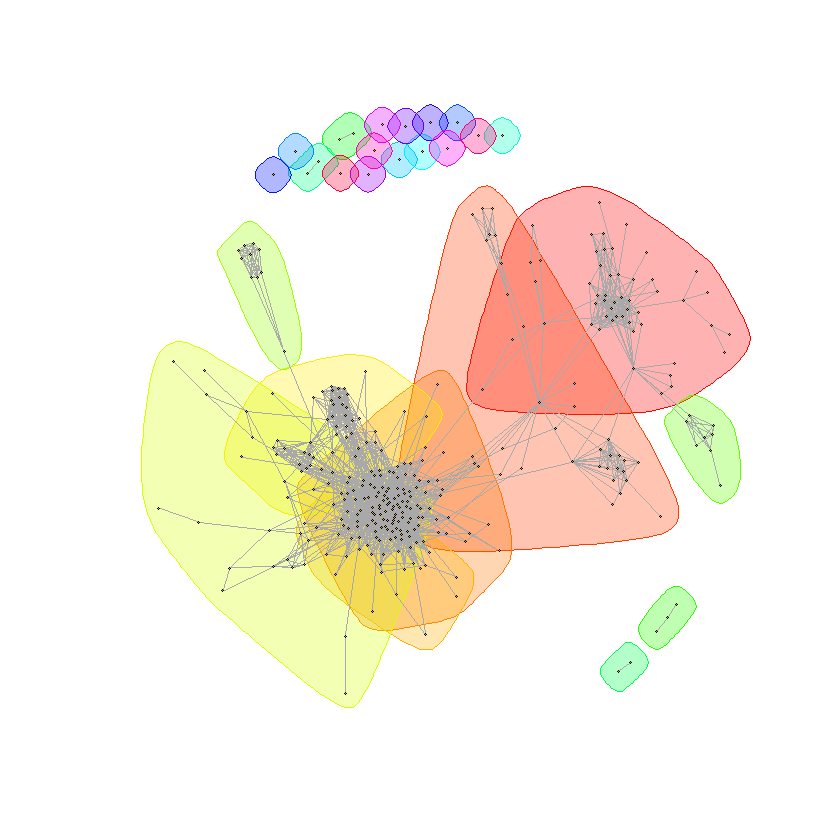

Modularity of fg 108 = 0.4581
Modularity of eb 108 = 0.5213
Modularity of i 108 = 0.5205


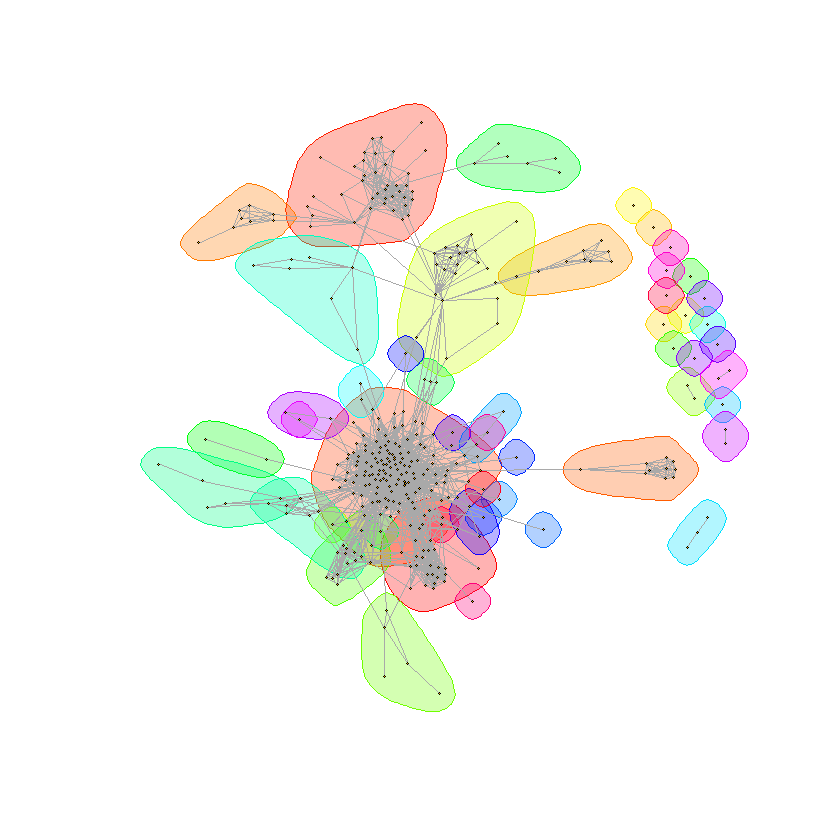

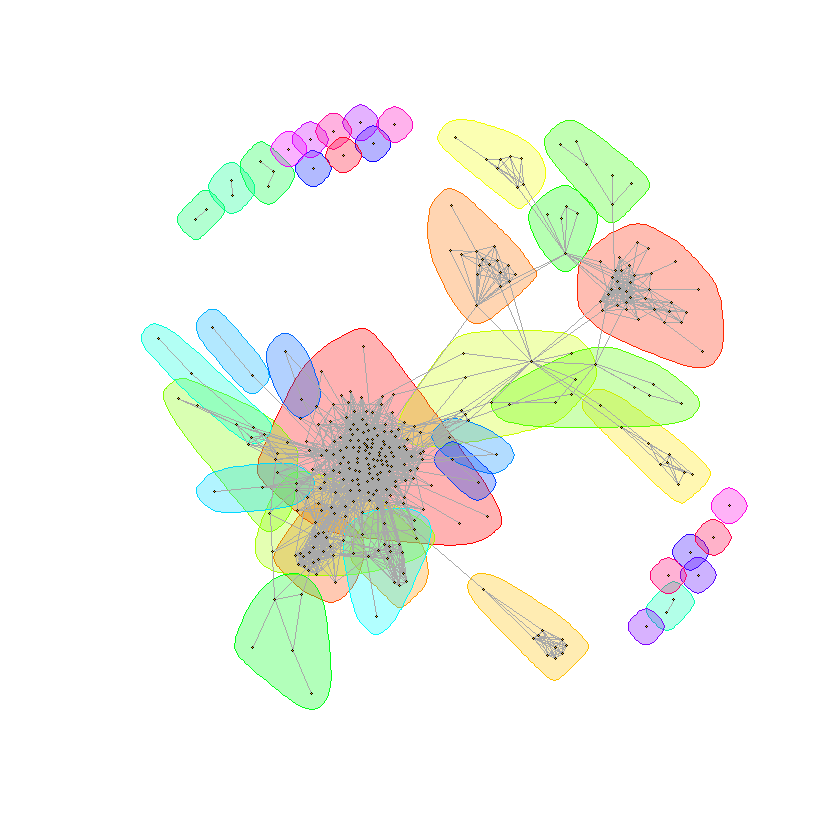

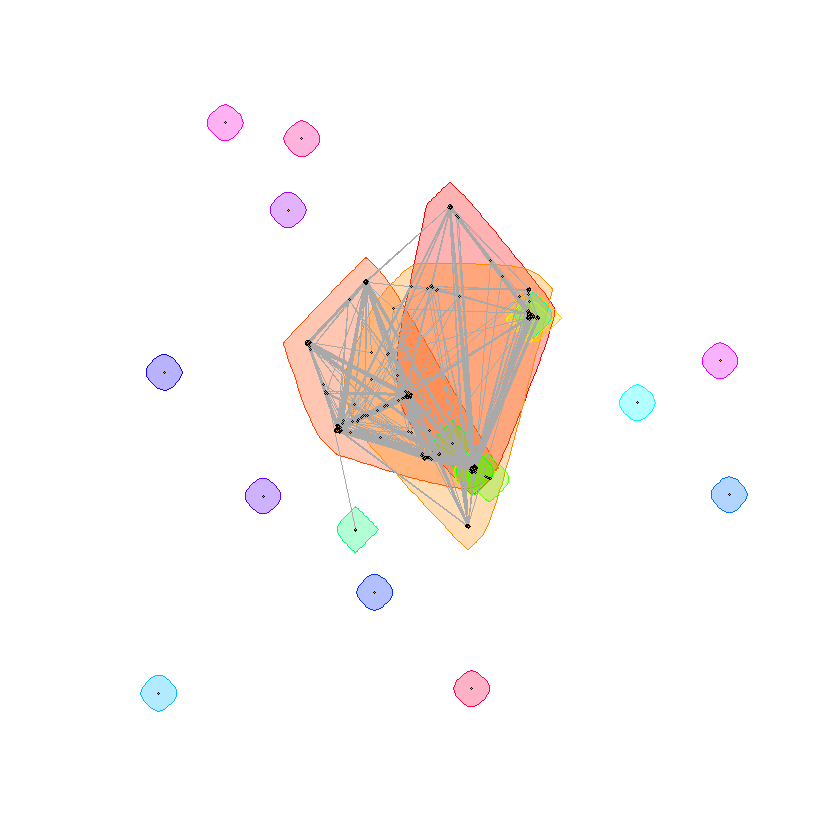

Modularity of fg 349 = 0.2457
Modularity of eb 349 = 0.1506
Modularity of i 349 = 0.2466


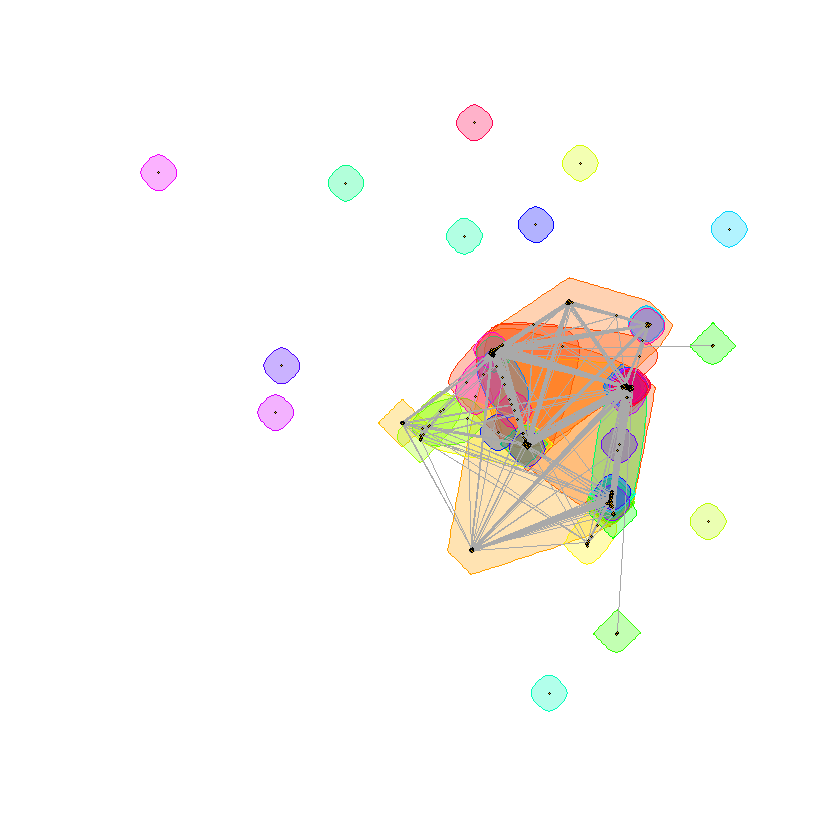

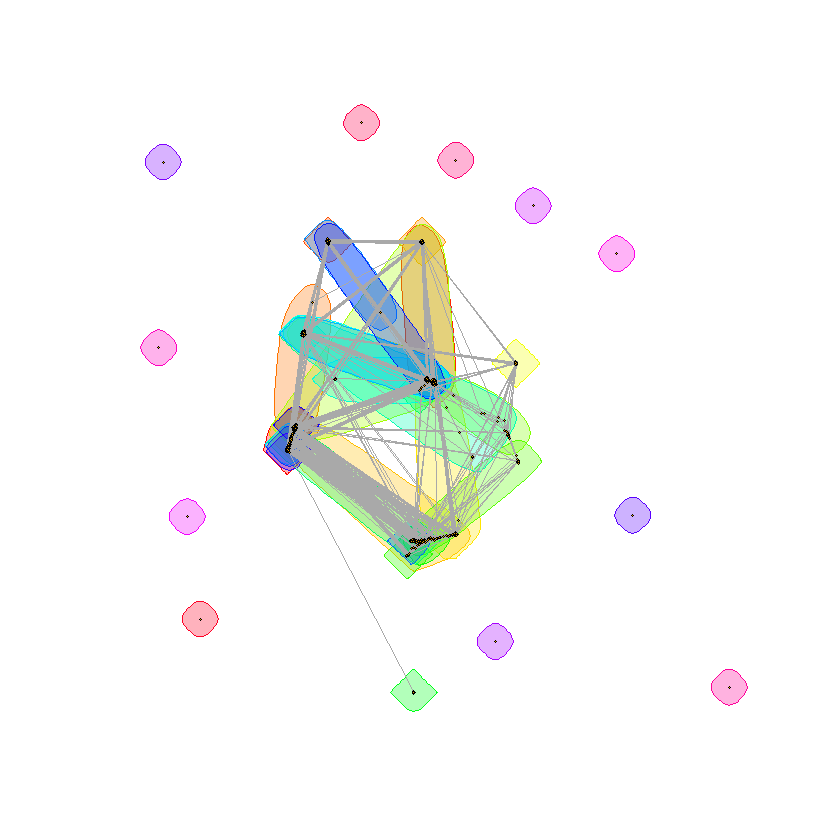

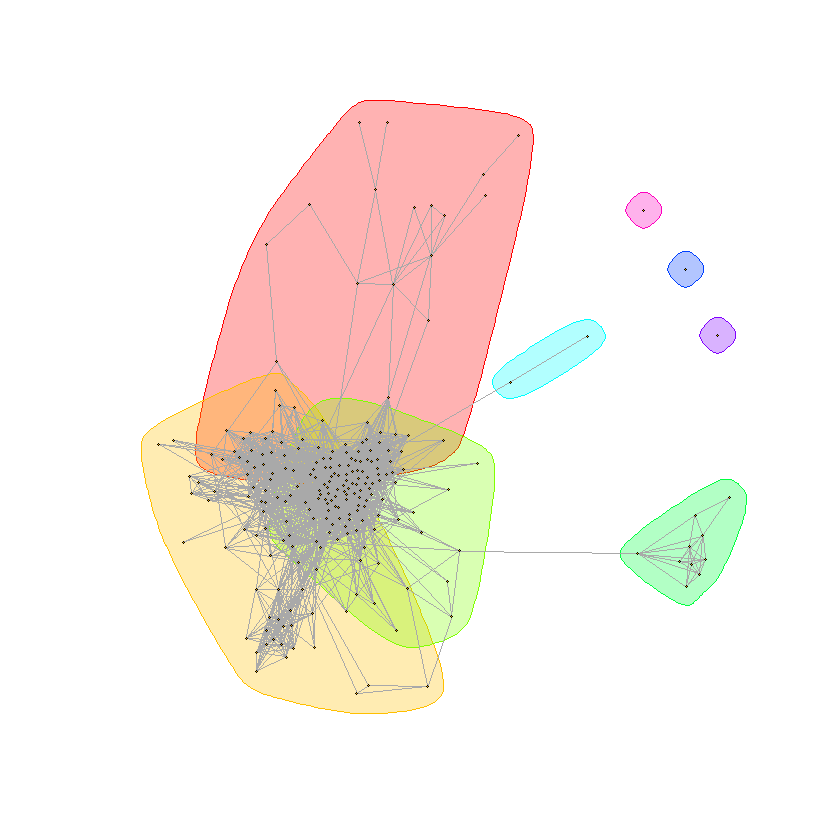

Modularity of fg 484 = 0.5342
Modularity of eb 484 = 0.5154
Modularity of i 484 = 0.5434


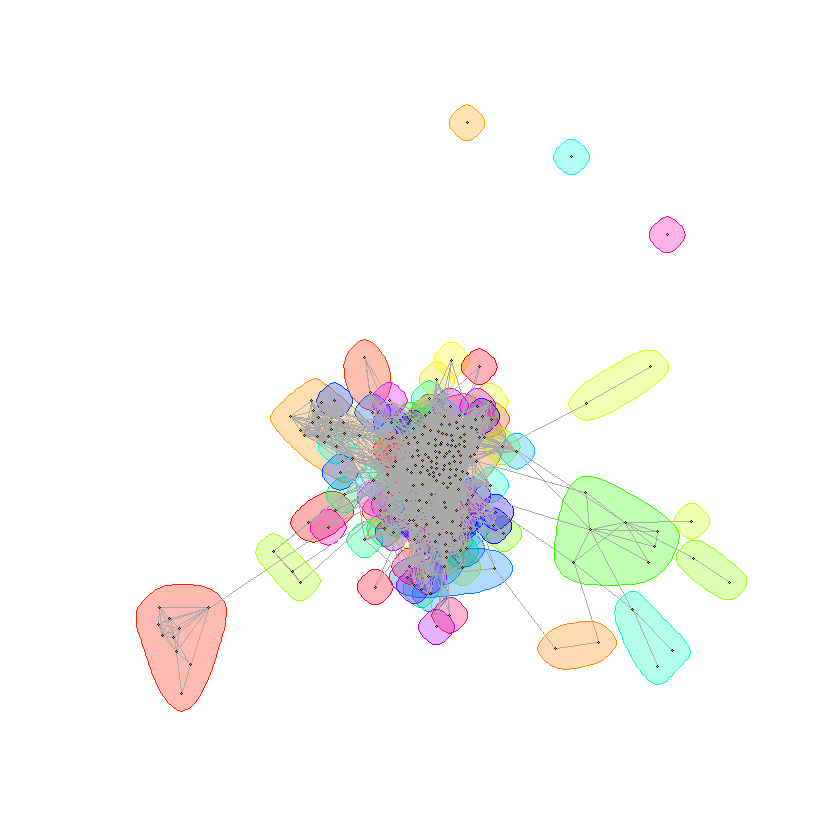

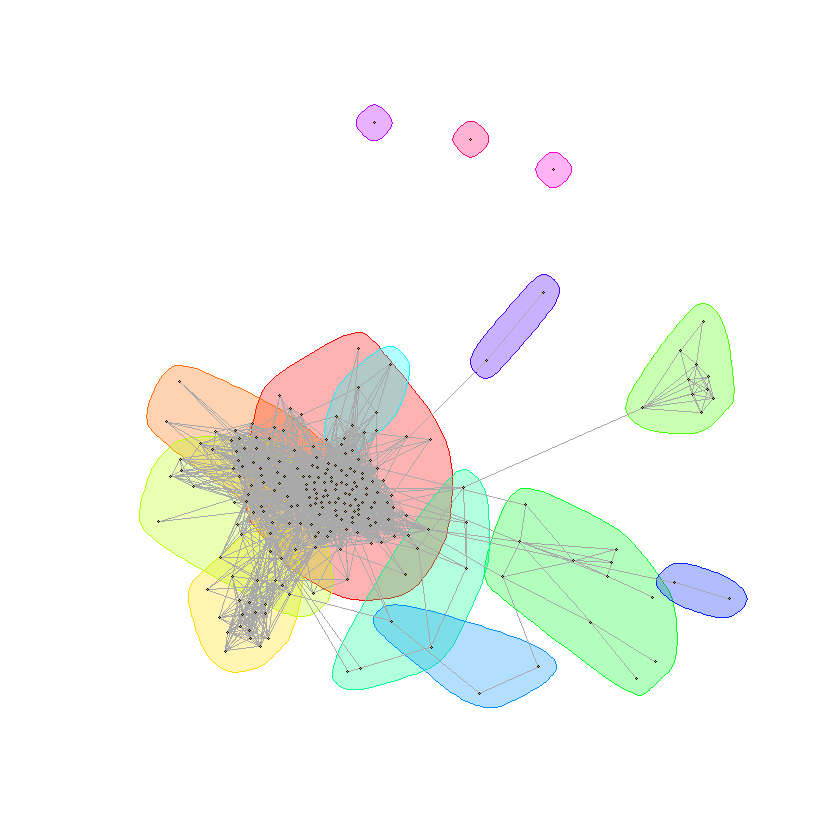

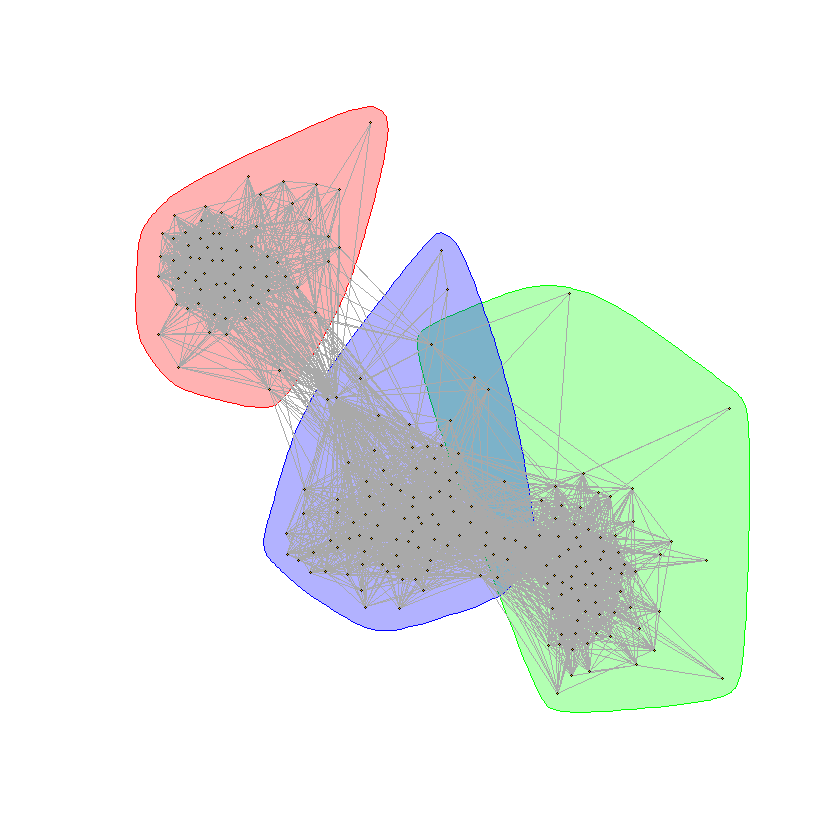

Modularity of fg 1087 = 0.1482
Modularity of eb 1087 = 0.0325
Modularity of i 1087 = 0.0274


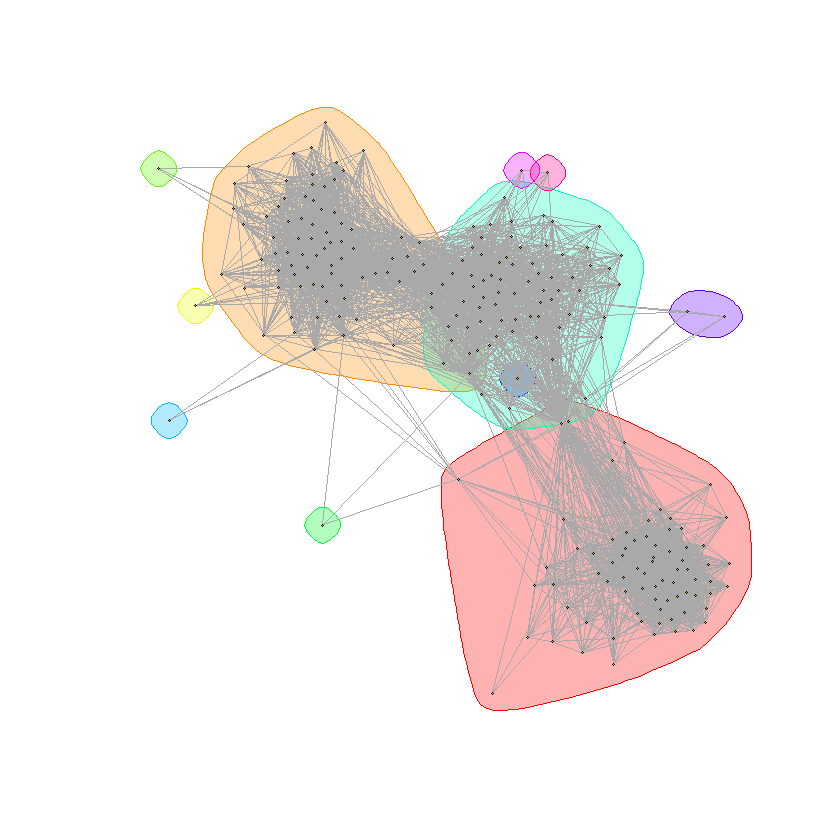

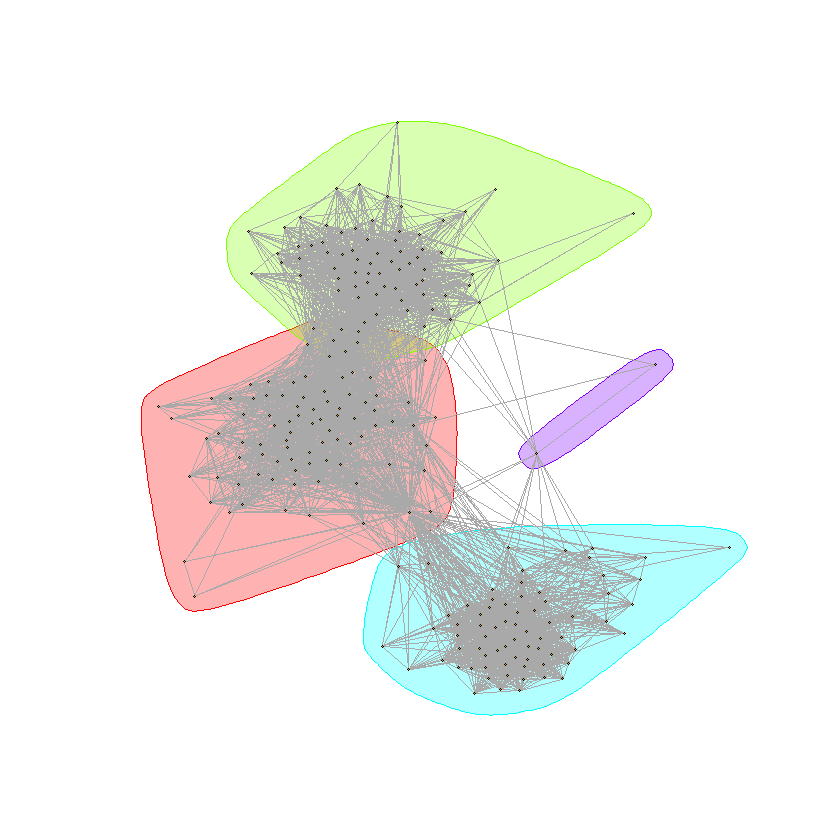

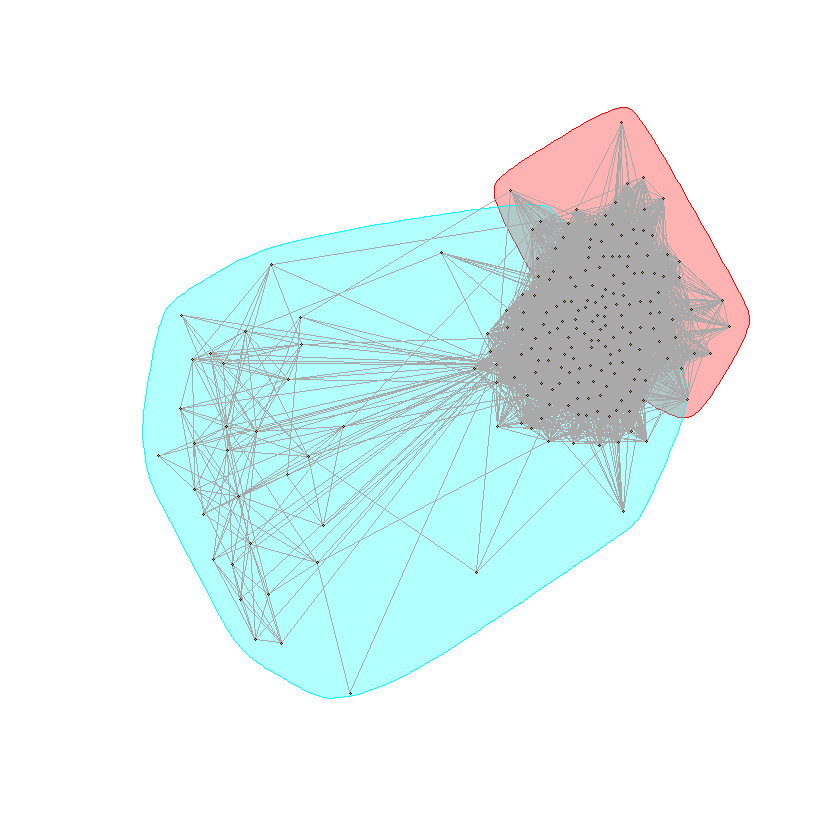

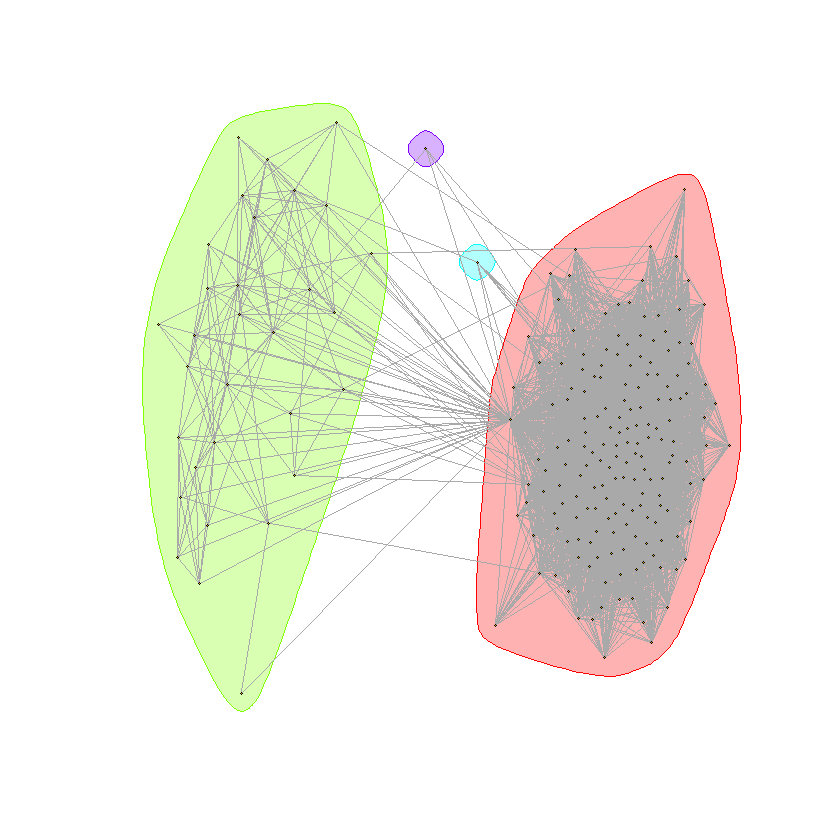

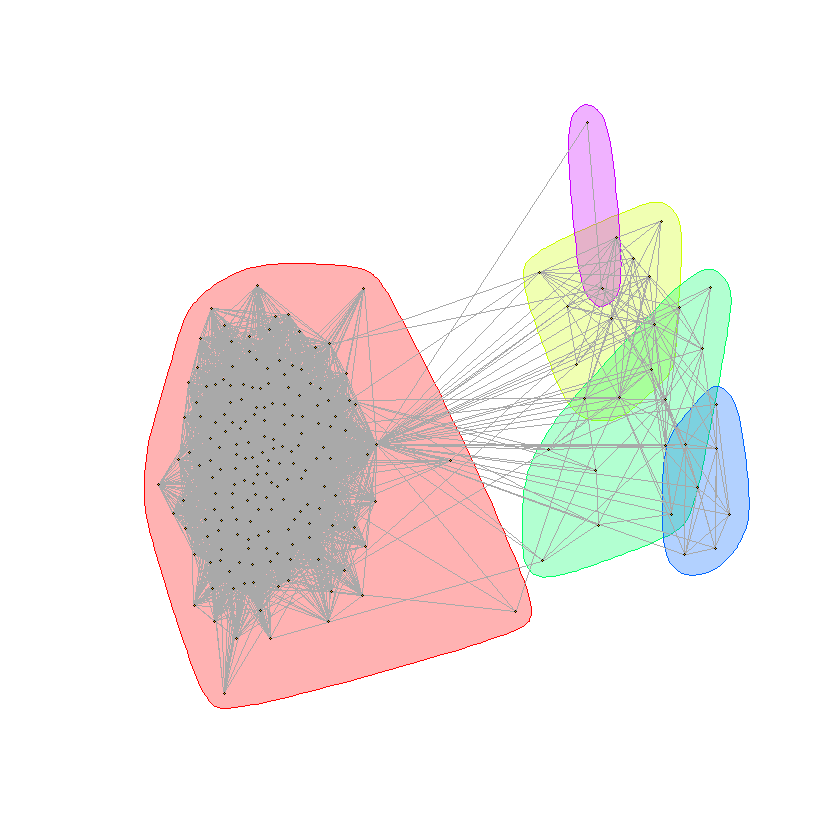

In [34]:
#set_vertex_attr(g, name="id", index=1, value="sdfs")
# set_vertex_attr(g, "color", value = "red")

core_removed_personalized_networks = array(NA, 5)

for(i in 1:length(core_nodes)){
    core_node = core_nodes[i]
    for(v in V(personalized_networks[[i]])){
        if(vertex_attr(personalized_networks[[i]], index=v, name="id") == core_node){
            core_removed_personalized_network = delete_vertices(personalized_networks[[i]], v)
            #print(vcount(personalized_networks[[i]]))
            #print(vcount(core_removed_personalized_network))
            comms_fg= cluster_fast_greedy(core_removed_personalized_network, modularity=TRUE)
            comms_eb= cluster_edge_betweenness(core_removed_personalized_network, modularity=TRUE)
            comms_i= cluster_infomap(core_removed_personalized_network, modularity=TRUE)
            printf("Modularity of fg %d = %.4f\n", core_node, modularity(comms_fg))
            printf("Modularity of eb %d = %.4f\n", core_node, modularity(comms_eb))
            printf("Modularity of i %d = %.4f\n", core_node, modularity(comms_i))
            
            png(sprintf("plots/p2q1_10_%d_fg.png", core_node))
            plot(core_removed_personalized_network, mark.groups=groups(comms_fg), vertex.size=1, vertex.label=NA)
            dev.off()
            png(sprintf("plots/p2q1_10_%d_eb.png", core_node))
            plot(core_removed_personalized_network, mark.groups=groups(comms_eb), vertex.size=1, vertex.label=NA)
            dev.off()
            png(sprintf("plots/p2q1_10_%d_i.png", core_node))
            plot(core_removed_personalized_network, mark.groups=groups(comms_i), vertex.size=1, vertex.label=NA)
            dev.off()
            
            plot(core_removed_personalized_network, mark.groups=groups(comms_fg), vertex.size=1, vertex.label=NA)
            plot(core_removed_personalized_network, mark.groups=groups(comms_eb), vertex.size=1, vertex.label=NA)
            plot(core_removed_personalized_network, mark.groups=groups(comms_i), vertex.size=1, vertex.label=NA)
        }
    }
}

### Q11

Embeddedness (v) = degree(v) - 1

### Q12

In [37]:
core_node_new_ids = array(NA, 5)

In [38]:
for(i in 1:length(core_nodes)){
    core_node = core_nodes[i]
    for(v in V(personalized_networks[[i]])){
        if(vertex_attr(personalized_networks[[i]], index=v, name="id") == core_node){
            core_node_new_ids[i] = v;
            break;
        }
    }
}

In [39]:
print(core_node_new_ids)

[1]  1  3  5 41 38


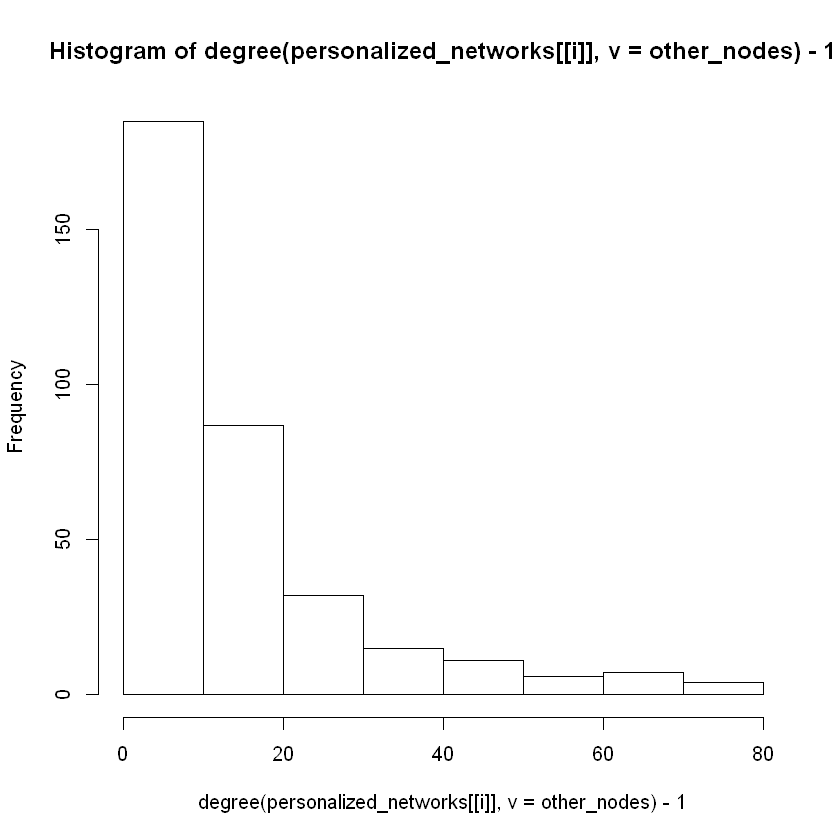

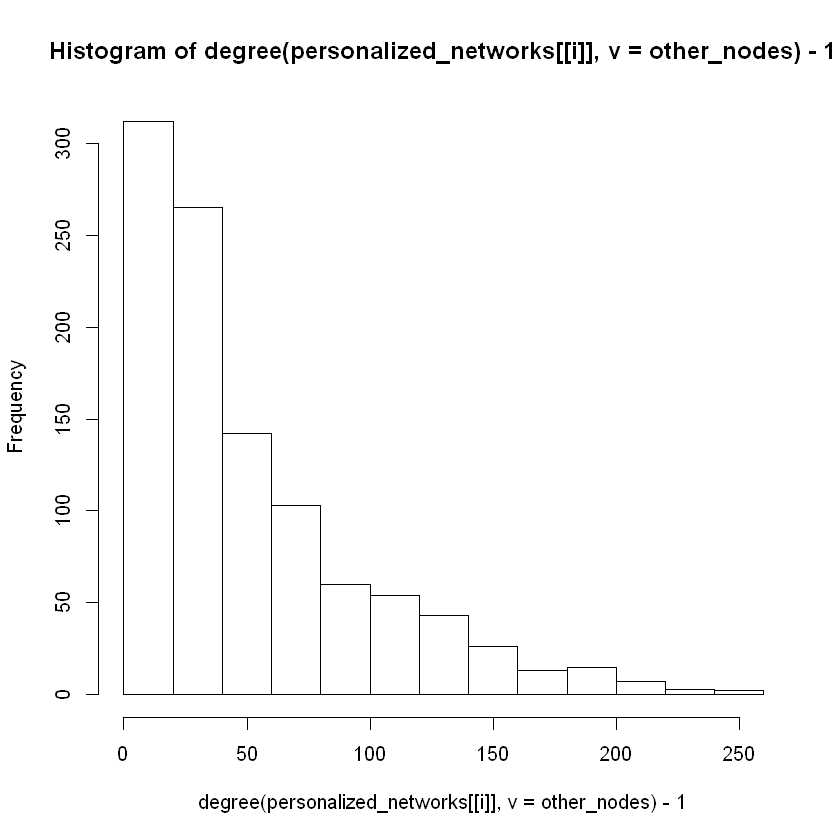

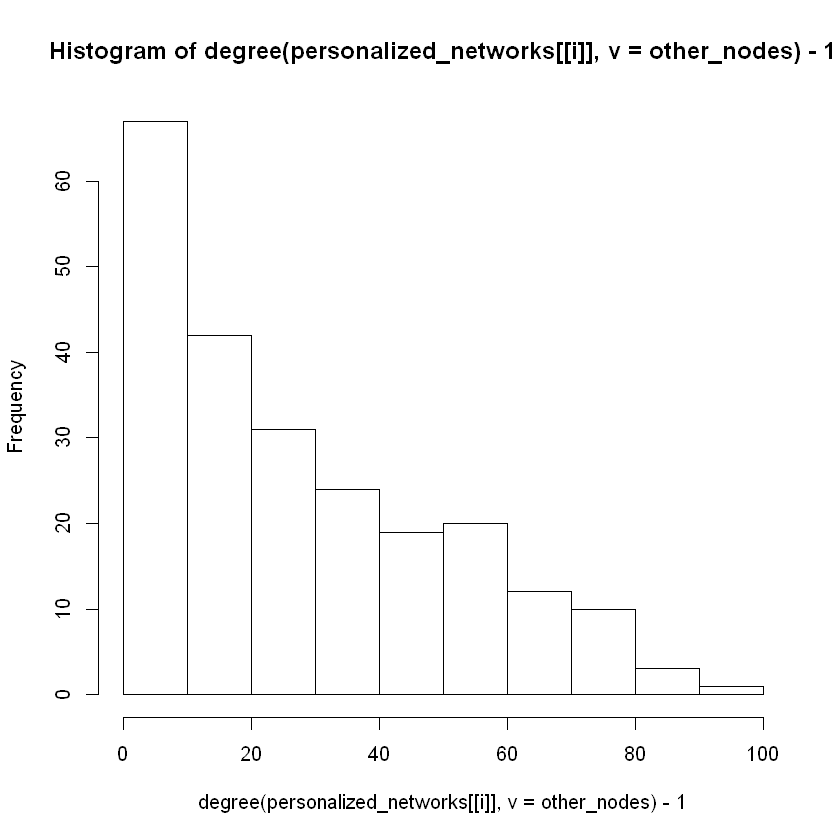

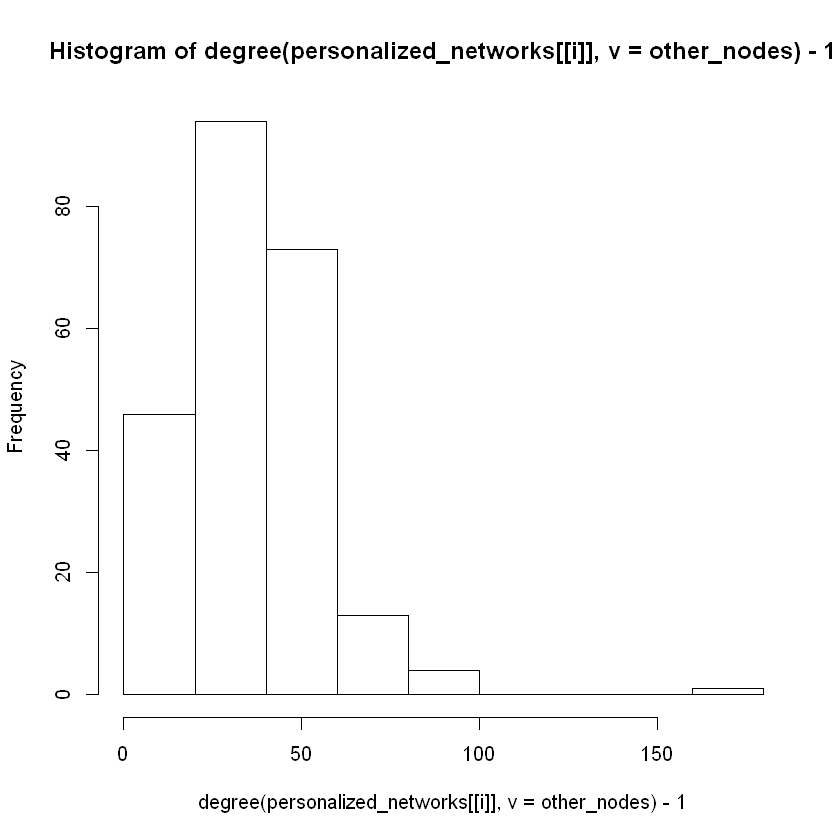

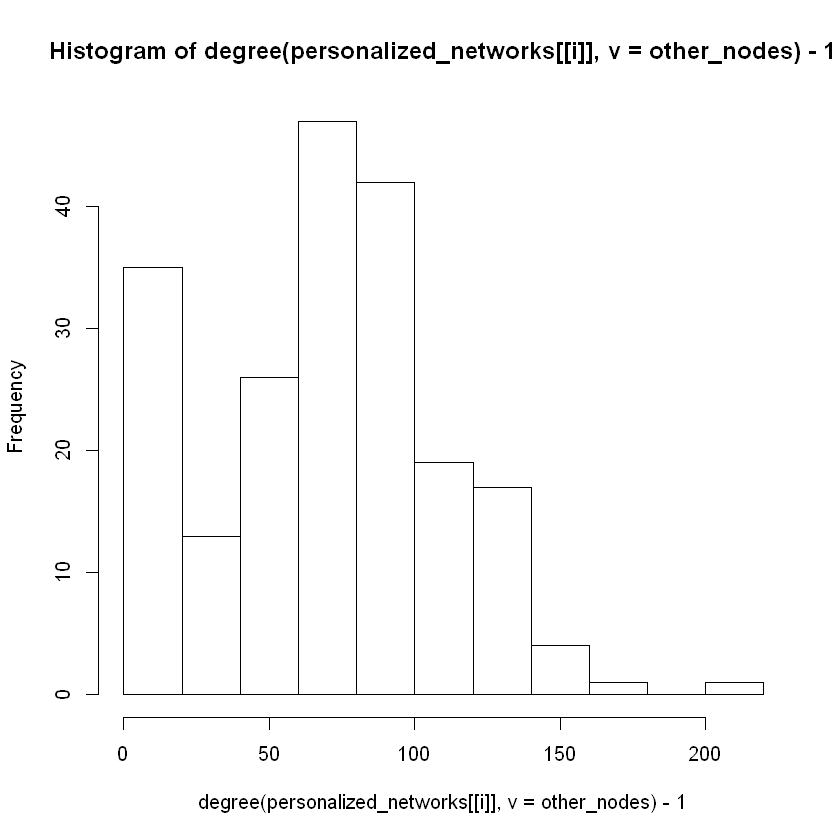

In [43]:
for(i in 1:length(core_nodes)){
    core_node = core_nodes[i]
    
    other_nodes = setdiff(V(personalized_networks[[i]]), core_node_new_ids[i])
    
    hist(degree(personalized_networks[[i]], v=other_nodes)-1)
}

In [110]:
vec = c(1, 3 ,5 ,6)

In [123]:
c(3, 5, 8, 8, 5, 4)[c(3, 5, 8, 8, 5, 4) %in% c( 5, 8)]

[1] 5 8 8 5

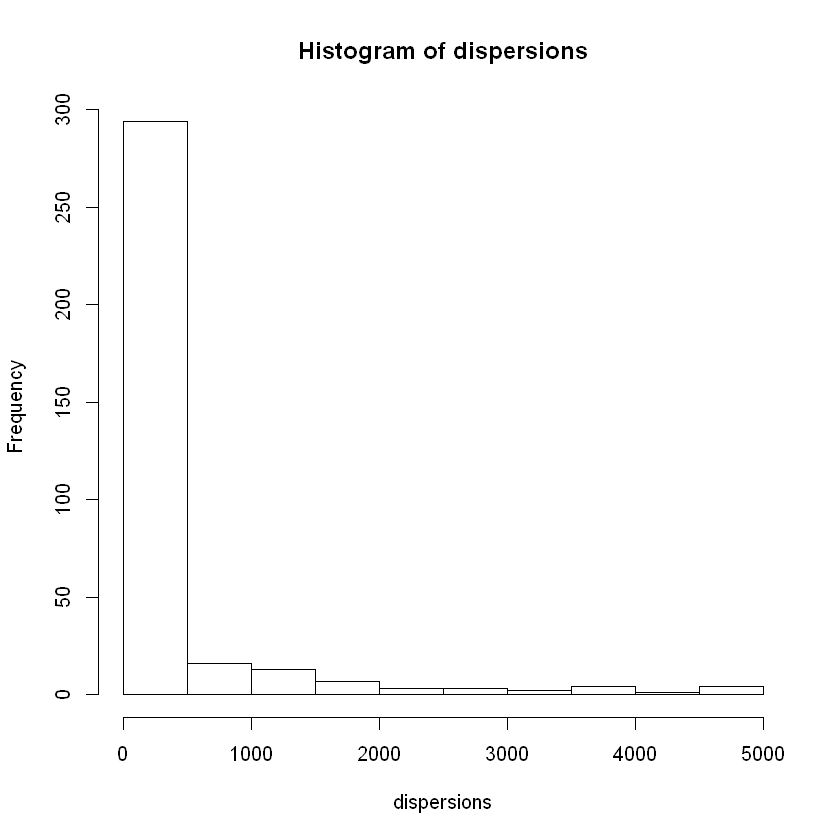

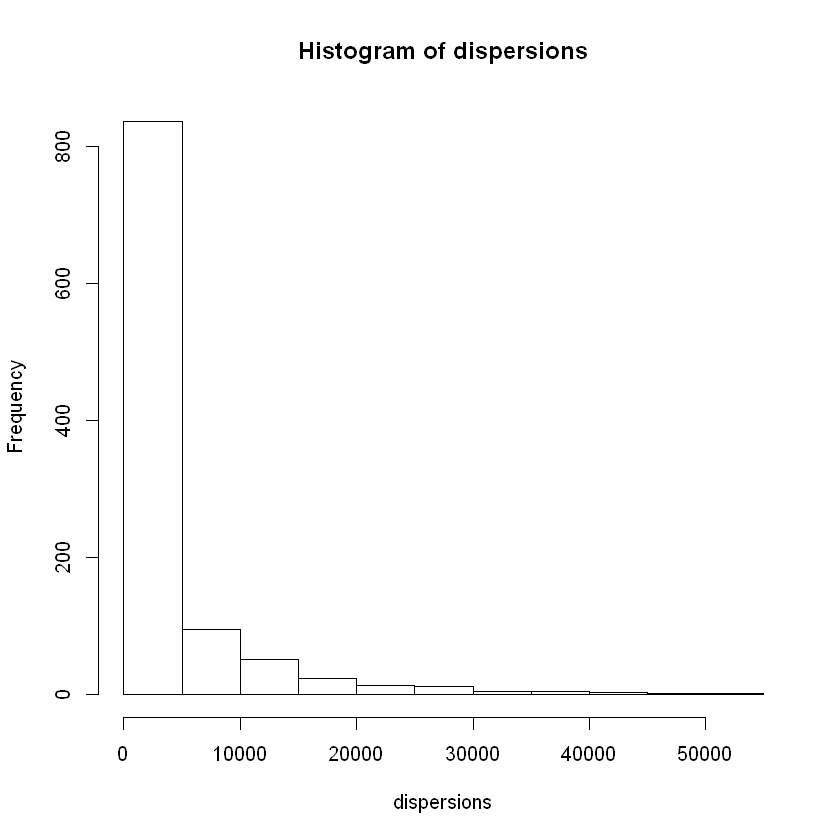

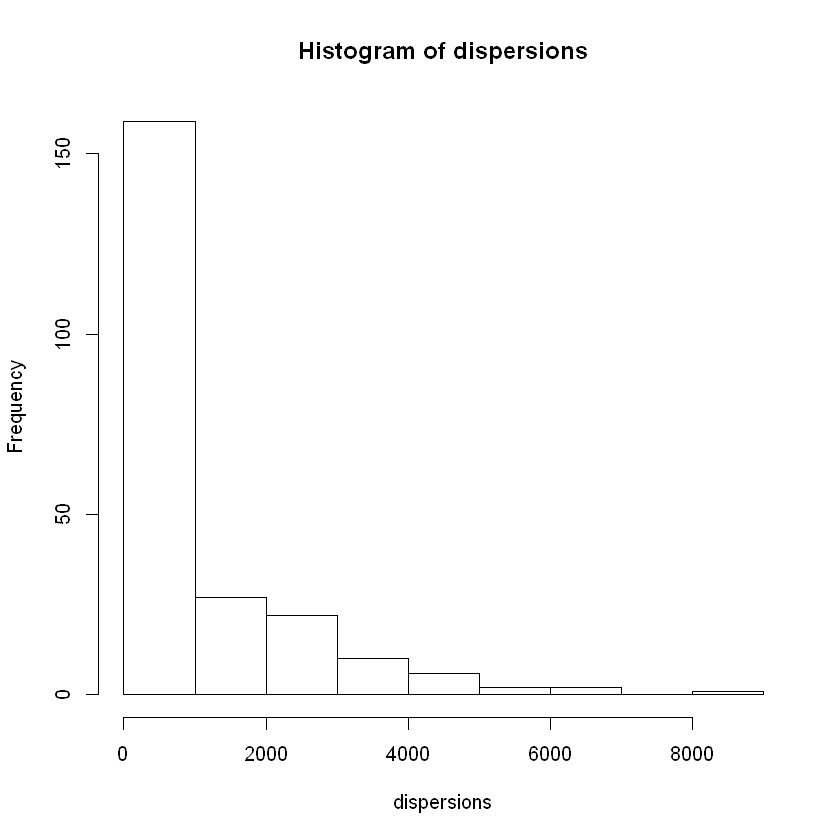

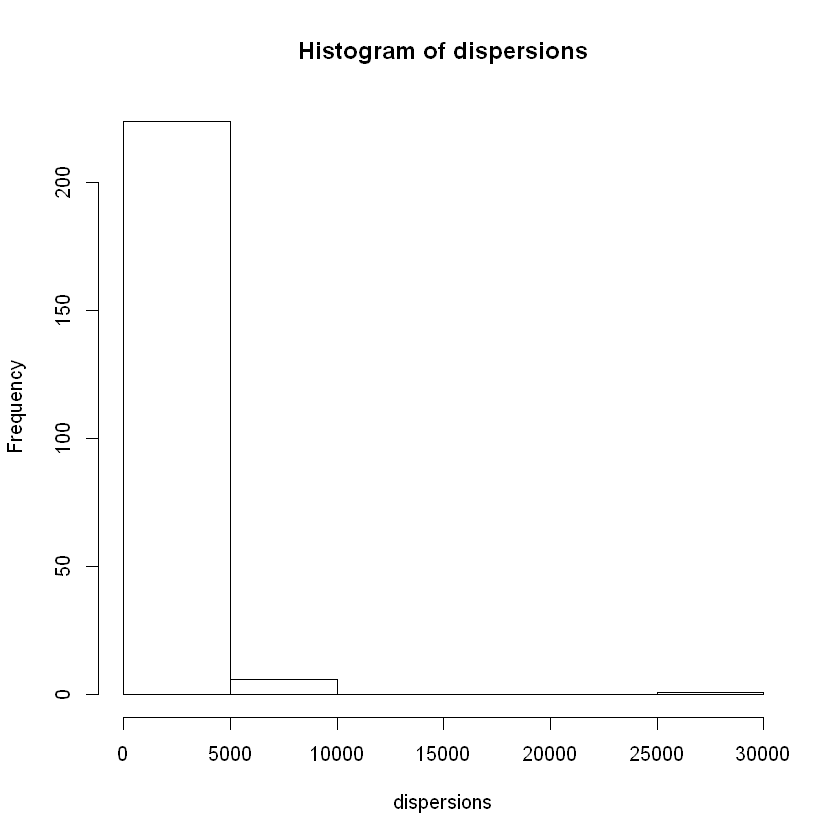

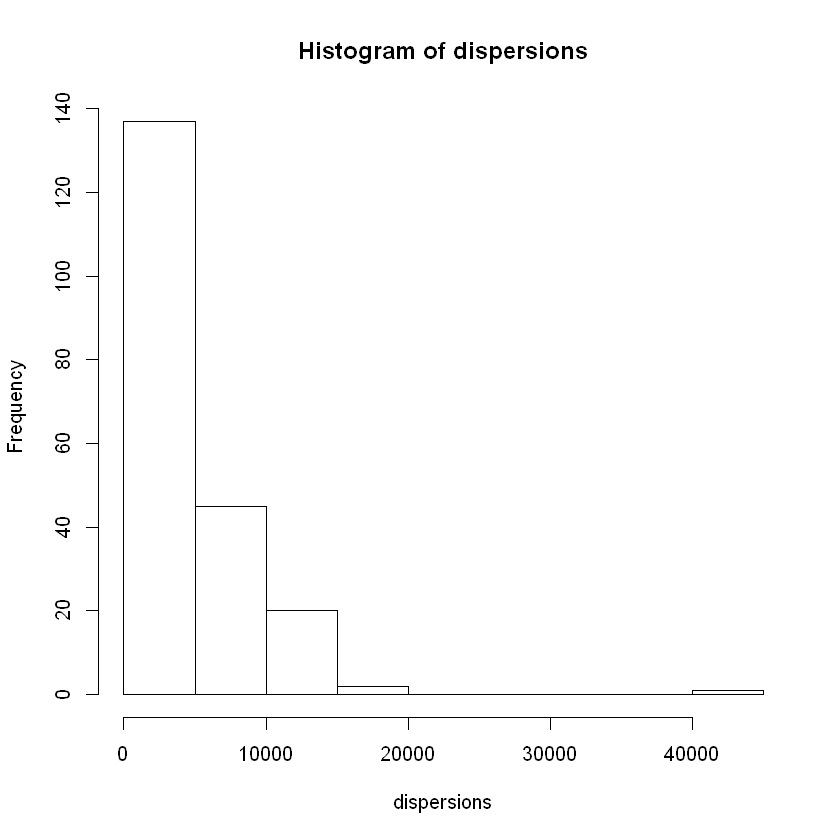

In [130]:
for(i in 1:length(core_nodes)){
    core_node = core_nodes[i]
    personalized = personalized_networks[[i]]
    
    core_neighbors = neighbors(personalized, v=core_node_new_ids[i])
    dispersions = array(NA, length(core_neighbors))
    
    for(j in 1:length(core_neighbors)){
        neighbor = core_neighbors[j]
        neighbors_neighbors = neighbors(personalized, v=neighbor)
        mutual_neighbors = intersection(core_neighbors, neighbors_neighbors)
        
        removed_network = delete_vertices(personalized, c(core_node_new_ids[i], neighbor))
        
        mut = V(removed_network)[V(removed_network)$id %in% mutual_neighbors$id]
        
        dist = distances(removed_network, v=mut, to=mut)
        dist[is.infinite(dist)] = 0
        
        dis = sum(dist) / 2
        dispersions[j] = dis
        #print(dis)
    }
    
    hist(dispersions)
}

### Q13, Q14

Node with maximum dispersion for core node 1 is 57
Node with maximum embeddedness for core node 1 is 57
Node with maximum dispersion/embeddedness for core node 1 is 26


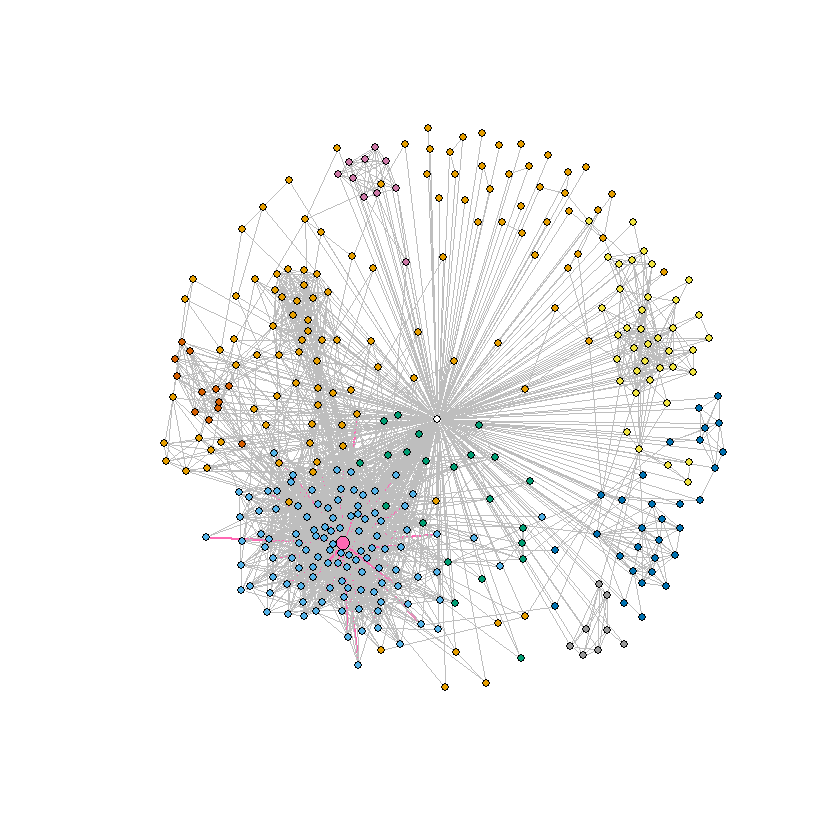

Node with maximum dispersion for core node 108 is 1889
Node with maximum embeddedness for core node 108 is 1889
Node with maximum dispersion/embeddedness for core node 108 is 1889


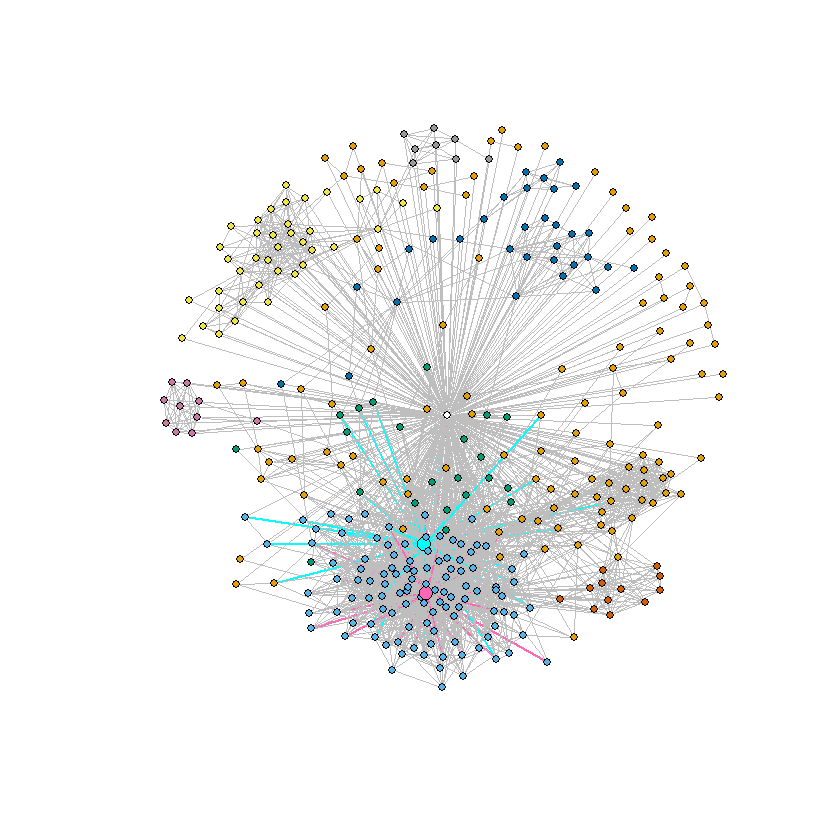

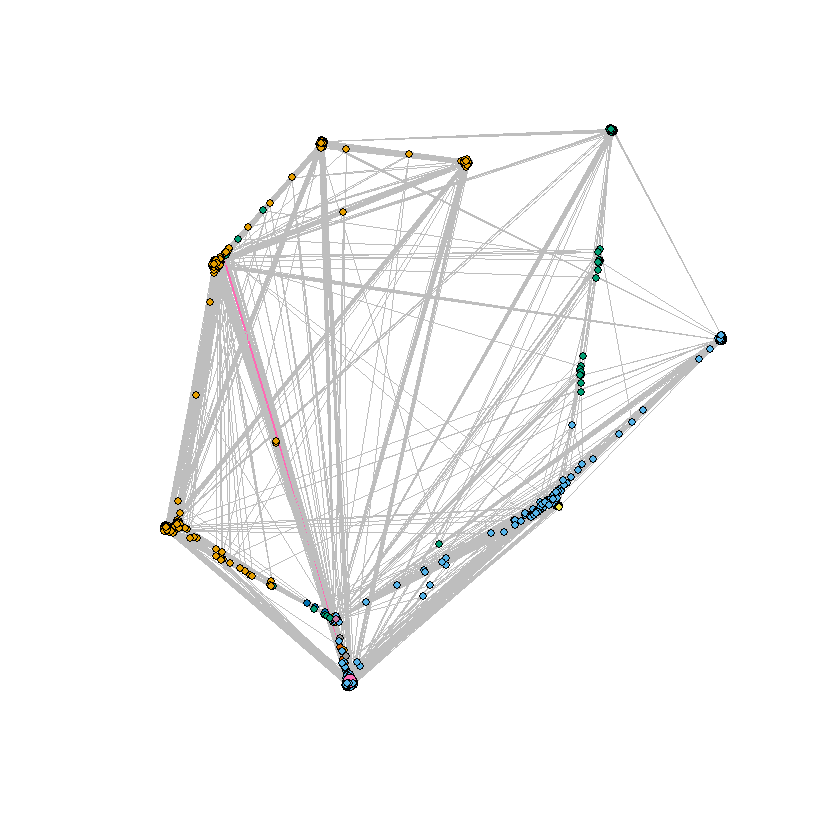

Node with maximum dispersion for core node 349 is 377
Node with maximum embeddedness for core node 349 is 377
Node with maximum dispersion/embeddedness for core node 349 is 377


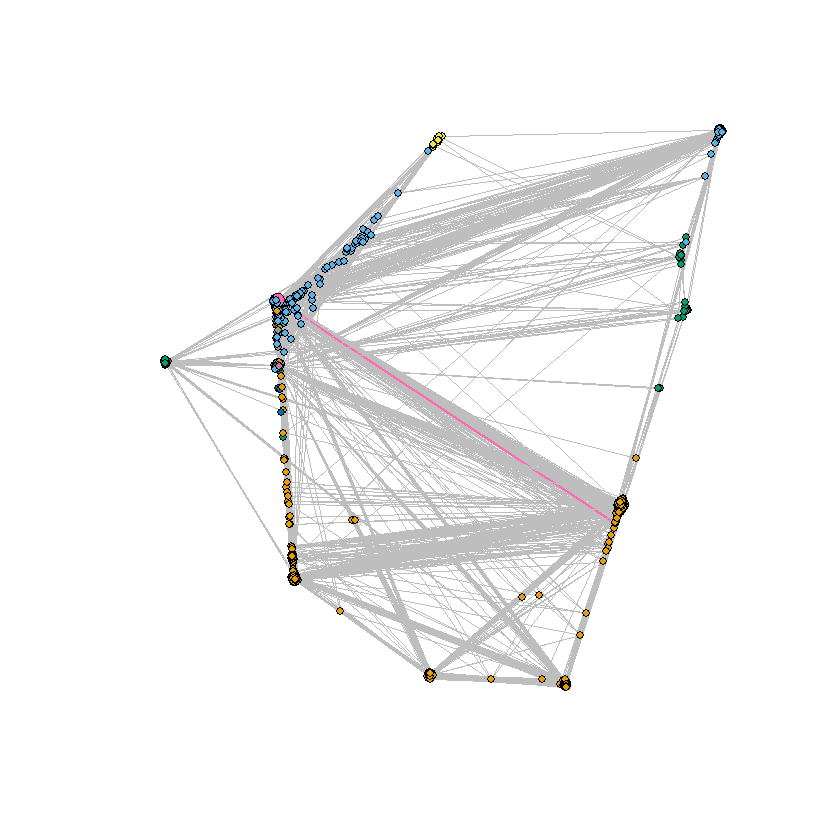

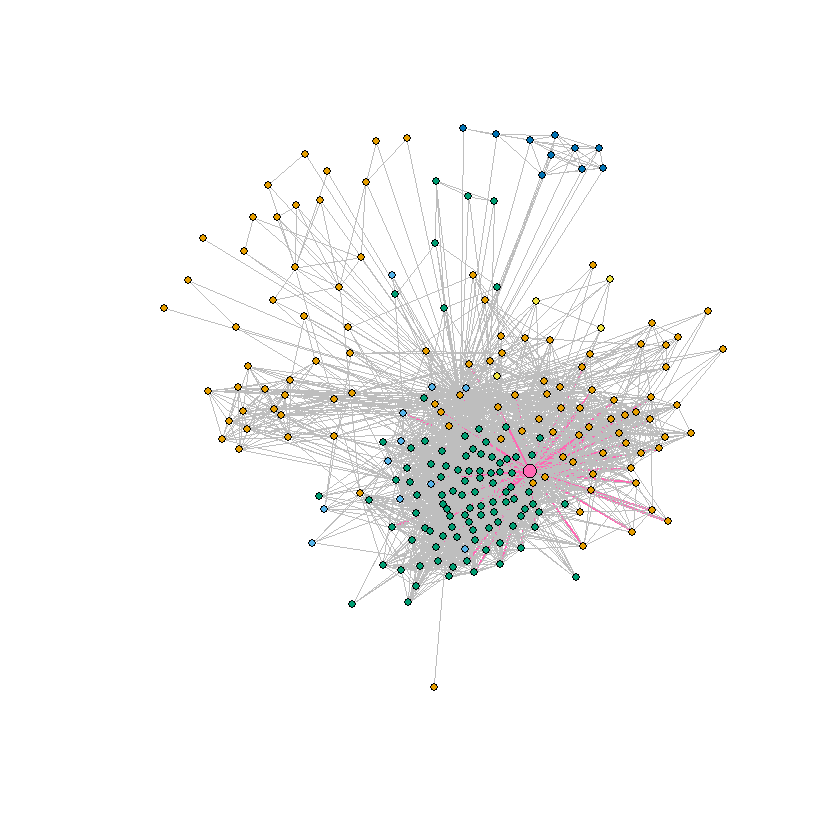

Node with maximum dispersion for core node 484 is 108
Node with maximum embeddedness for core node 484 is 108
Node with maximum dispersion/embeddedness for core node 484 is 108


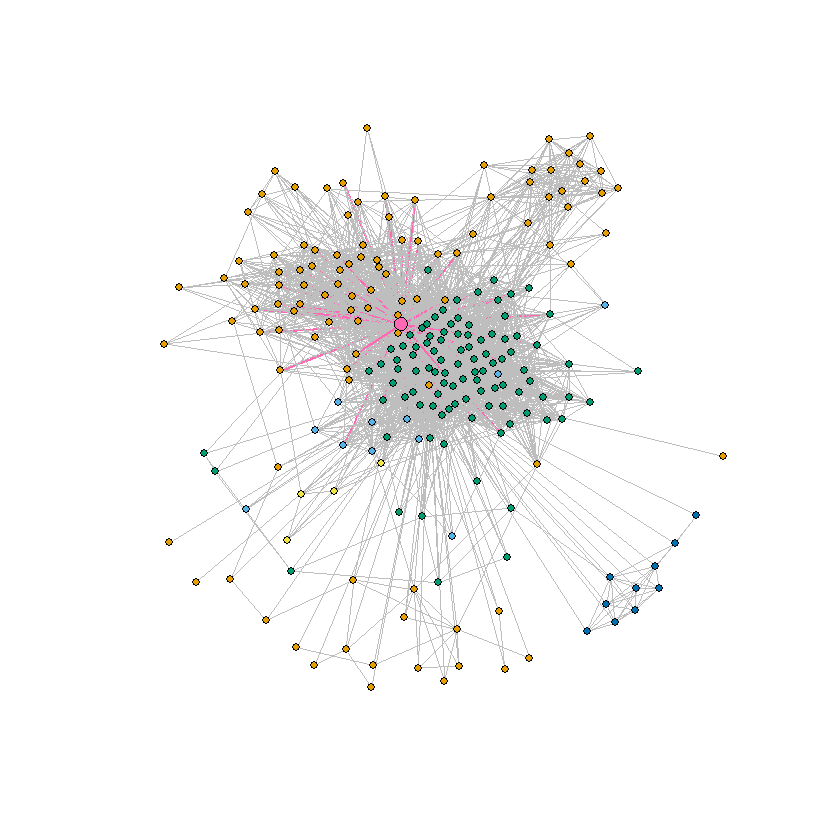

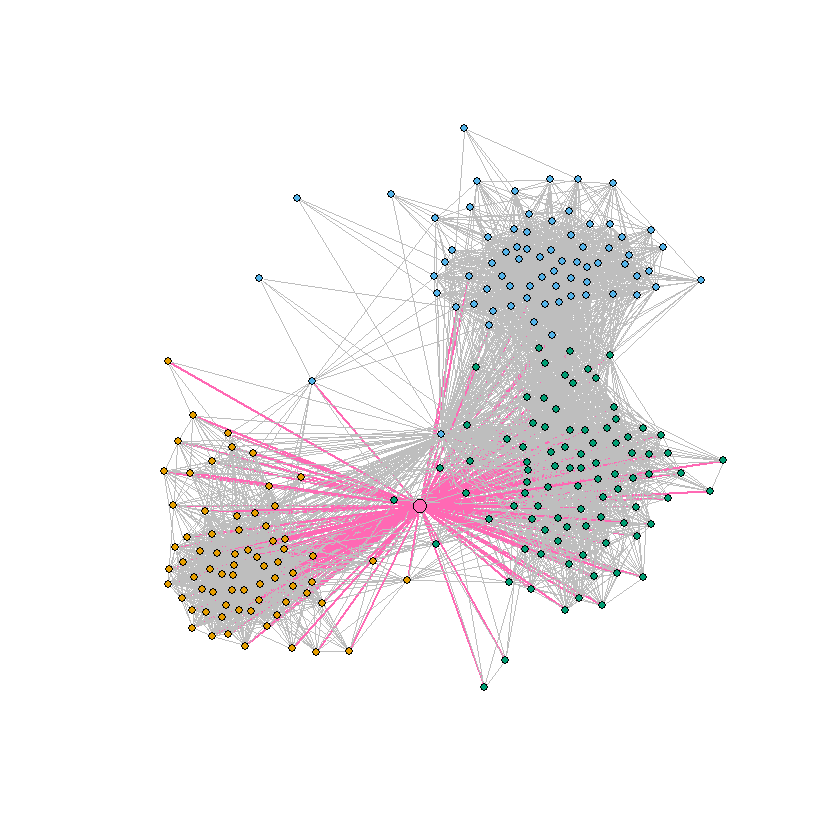

Node with maximum dispersion for core node 1087 is 108
Node with maximum embeddedness for core node 1087 is 108
Node with maximum dispersion/embeddedness for core node 1087 is 108


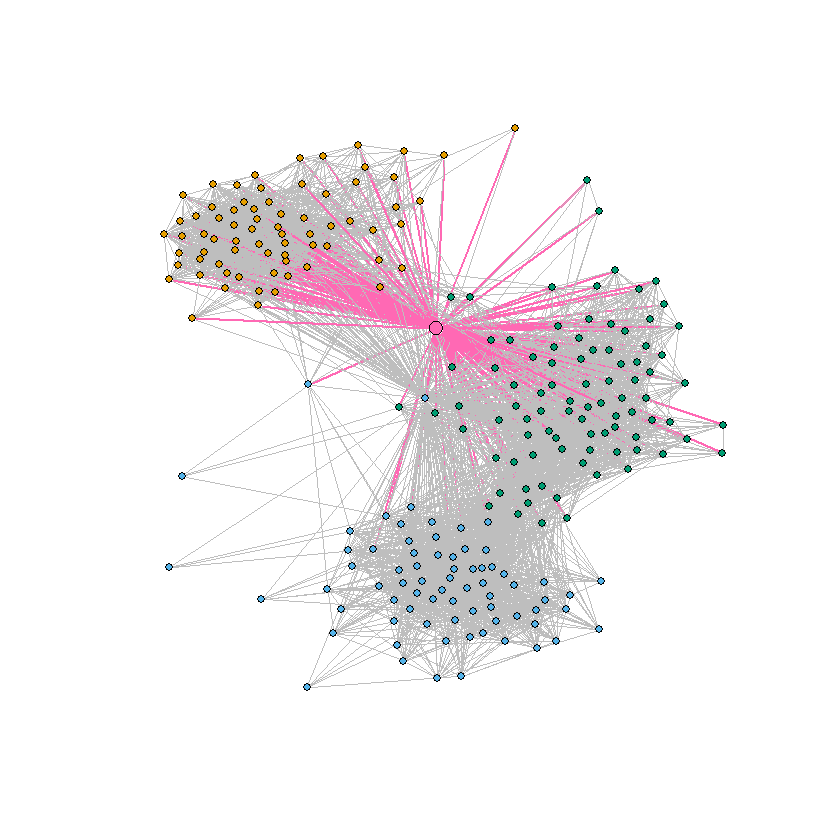

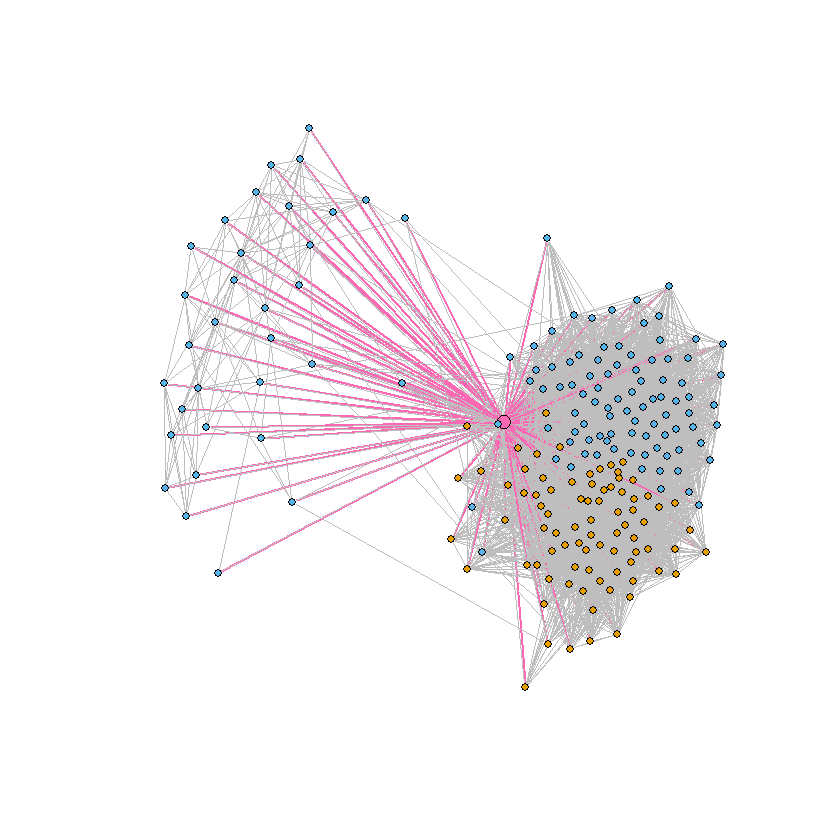

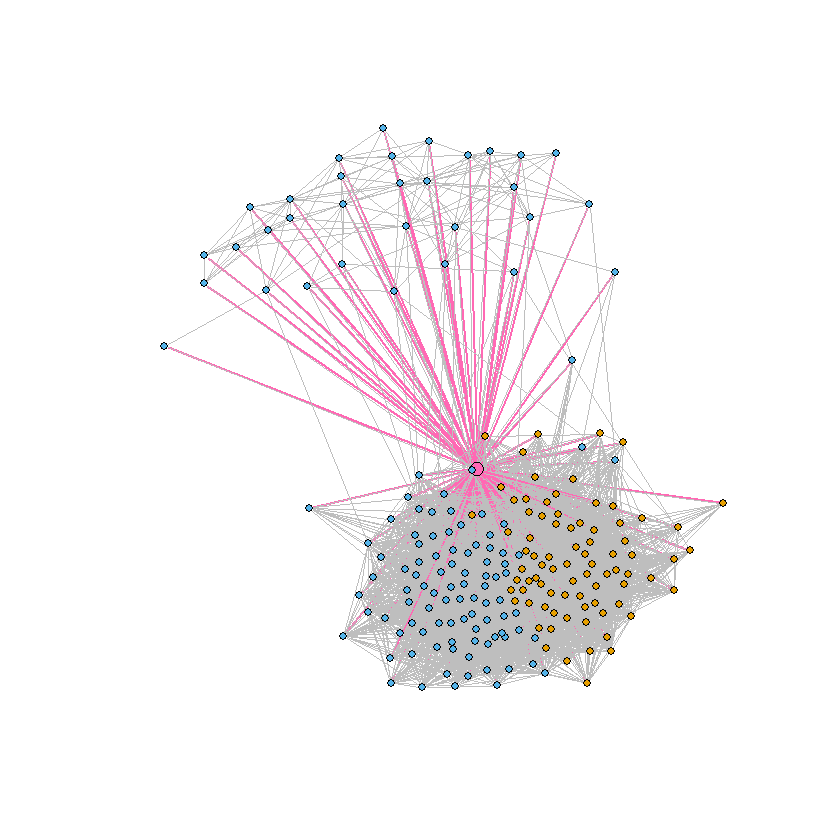

In [134]:
for(i in 1:length(core_nodes)){
    core_node = core_nodes[i]
    personalized = personalized_networks[[i]]
    
    core_neighbors = neighbors(personalized, v=core_node_new_ids[i])
    
    
    
#     print(is.unsorted(vertex_attr(personalized_networks[[i]], index=other_nodes, name="id")))
    
    #print(is.unsorted(other_nodes$id))
    
    embeddedness = degree(personalized, v=core_neighbors)-1;
    
    
    
#     print(is.unsorted(core_neighbors))
    
#     print(setdiff(vertex_attr(personalized_networks[[i]], index=other_nodes, name="id"), core_neighbors))
    
    dispersions = array(NA, length(core_neighbors))
    
    for(j in 1:length(core_neighbors)){
        neighbor = core_neighbors[j]
        neighbors_neighbors = neighbors(personalized, v=neighbor)
        mutual_neighbors = intersection(core_neighbors, neighbors_neighbors)
        
        
        removed_network = delete_vertices(personalized, c(core_node_new_ids[i], neighbor))
        
        mut = V(removed_network)[V(removed_network)$id %in% mutual_neighbors$id]
        
        dist = distances(removed_network, v=mut, to=mut)
        dist[is.infinite(dist)] = 0
        
        dis = sum(dist) / 2
        dispersions[j] = dis
        #print(dis)
    }
    
    
    max_dis_node = core_neighbors[which.max(dispersions)]$id
    max_em_node = core_neighbors[which.max(embeddedness)]$id
    
    printf("Node with maximum dispersion for core node %d is %d\n", core_node, max_dis_node)
    
    printf("Node with maximum embeddedness for core node %d is %d\n", core_node, max_em_node)
    
    
    
    argmax_dis_over_em = -1;
    max_dis_over_em = -1;
    
    for(j in 1:length(core_neighbors)){
        if(embeddedness[j] > 0){
            if(dispersions[j]/embeddedness[j] > max_dis_over_em){
                max_dis_over_em = dispersions[j]/embeddedness[j]
                argmax_dis_over_em = j
            }
        }
    }
    
    max_dis_em_node =  core_neighbors[argmax_dis_over_em]$id
    
    printf("Node with maximum dispersion/embeddedness for core node %d is %d\n", core_node, max_dis_em_node)
    

    comms_fg= cluster_fast_greedy(personalized, modularity=TRUE)
    
    edge_color = rep("gray", length(E(personalized)))
    edge_weight = rep(0.5, length(E(personalized)))
    node_color = comms_fg$membership
    node_size = rep(3, length(V(personalized)))
    #node_label = rep(NA, length(V(personalized)))

    edge_color[incident(personalized, which(V(personalized)$id == max_dis_node))] = "hotpink";
    edge_weight[incident(personalized, which(V(personalized)$id == max_dis_node))] = 2;
    
    node_color[which(V(personalized)$id == core_node_new_ids[i])] = "white";
    node_color[which(V(personalized)$id == max_dis_node)] = "hotpink";
    
    node_size[which(V(personalized)$id == max_dis_node)] = 5;
    
    #node_label[which(V(personalized)$id == max_node)] = max_node;
    
    plot(personalized, vertex.size=node_size, vertex.label=NA, vertex.color = node_color, edge.width = edge_weight, edge.color = edge_color)
    
    edge_color = rep("gray", length(E(personalized)))
    edge_weight = rep(0.5, length(E(personalized)))
    node_color = comms_fg$membership
    node_size = rep(3, length(V(personalized)))
    
    edge_color[incident(personalized, which(V(personalized)$id == max_dis_em_node))] = "cyan";
    edge_weight[incident(personalized, which(V(personalized)$id == max_dis_em_node))] = 2;
    edge_color[incident(personalized, which(V(personalized)$id == max_em_node))] = "hotpink";
    edge_weight[incident(personalized, which(V(personalized)$id == max_em_node))] = 2;
    
    node_color[which(V(personalized)$id == core_node_new_ids[i])] = "white";
    node_color[which(V(personalized)$id == max_dis_em_node)] = "cyan";
    node_color[which(V(personalized)$id == max_em_node)] = "hotpink";
    
    node_size[which(V(personalized)$id == max_dis_em_node)] = 5;
    node_size[which(V(personalized)$id == max_em_node)] = 5;
    
    plot(personalized, vertex.size=node_size, vertex.label=NA, vertex.color = node_color, edge.width = edge_weight, edge.color = edge_color)
    
#     png(sprintf("plots/p2q1_9_%d_fg.png", core_nodes[i]))
#     plot(personalized_1, mark.groups=groups(comms_fg), vertex.size=1, vertex.label=NA)
#     dev.off()
    

    
}